# $\gamma p \rightarrow K^0 \Sigma^+$  MCMC Information

In [2]:
# Standard imports and setup...

# Numpy handles numerical manipulations efficiently...
import numpy as np

# Matplotlib is the standard python plotting library...
%matplotlib inline
import matplotlib.pyplot as plt

# Seaborn is a layer on top of Matplotlib...
import seaborn as sns

# Pandas is the python framework for handling datasets...
import pandas as pd

## Bins
4 x E $_{\gamma}$ bins, variable cos $\theta _{K0}$ bins

21 in total, approx 1,000 integrated signal per bin

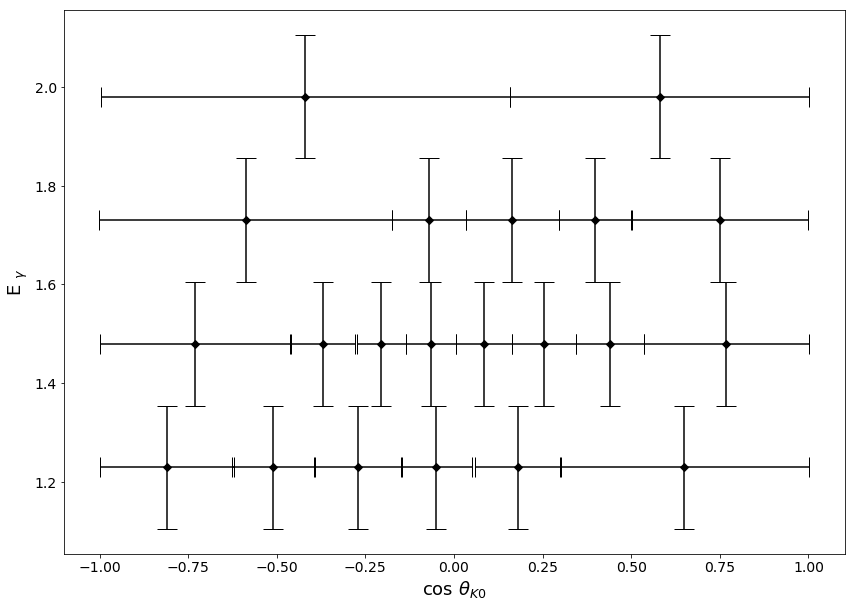

In [3]:
# bins
fig, axes = plt.subplots(1, 1, figsize=(14,10))

# Egamma 1.23
x=[-0.81,-0.51,-0.27,-0.05,0.18,0.65] 
y=[1.23,1.23,1.23,1.23,1.23,1.23]
x_err=[0.189,0.116,0.122,0.1,0.122,0.351]
y_err=[0.125,0.125,0.125,0.125,0.125,0.125]
plt.errorbar(x,y,xerr=x_err,yerr=y_err,color='black', fmt='D', capsize=10)

#Egamma 1.48
x=[-0.73,-0.37,-0.205,-0.065,0.085,0.255,0.44,0.768] 
y=[1.48,1.48,1.48,1.48,1.48,1.48,1.48,1.48]
x_err=[0.268,0.09,0.07,0.07,0.08,0.09,0.095,0.233]
y_err=[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]
plt.errorbar(x,y,xerr=x_err,yerr=y_err,color='black', fmt='D', capsize=10)

# Egamma 1.73
x=[-0.588,-0.07,0.165,0.398,0.75] 
y=[1.73,1.73,1.73,1.73,1.73]
x_err=[0.413,0.105,0.13,0.103,0.25]
y_err=[0.125,0.125,0.125,0.125,0.125]
plt.errorbar(x,y,xerr=x_err,yerr=y_err,color='black', fmt='D', capsize=10)

#Egamma 1.98
x=[-0.42,0.58] 
y=[1.98,1.98]
x_err=[0.577,0.4225]
y_err=[0.125,0.125]
plt.errorbar(x,y,xerr=x_err,yerr=y_err,color='black', fmt='D', capsize=10)

axes.set_xlabel(r'cos $\theta _{K0}$', fontsize=18)
axes.set_ylabel(r'E $_{\gamma}$', fontsize=18)
plt.tick_params(labelsize=14)


## Read in csv data and extract bin centres from file name


In [4]:
# Definition of columns in csv
csv_labels = ['Obs','Val','FileName']
# Read file into a DataFrame...
#csv_df = pd.read_csv('/home/louise/g8K0Sig/code/MCMCamp2/out8/CsvAllBins.csv', names=csv_labels)
csv_df = pd.read_csv('/home/louise/g8K0Sig/code/AllObsAmp3/out1/CsvAllBins.csv', names=csv_labels)
# Print first few rows as a check...
csv_df.head()

Obs       Val                    FileName
0   B  0.132053  costhK0CMS0.40_Egamma1.73_
1  Ox  0.225589  costhK0CMS0.40_Egamma1.73_
2  Oz -0.898178  costhK0CMS0.40_Egamma1.73_
3   R  0.370324  costhK0CMS0.40_Egamma1.73_
4   T  0.321151  costhK0CMS0.40_Egamma1.73_

In [5]:
# get the bin centres from the file name
file_str = 'costhK0CMS0.58_Egamma1.98_'
file_str.find('_Egamma')
file_str[10:file_str.find('_Egamma')] 
bins = file_str[10:file_str.find('_Egamma')], file_str[file_str.find('_Egamma')+7:len(file_str)-1]
print(bins)

('0.58', '1.98')


In [6]:
# Create new column in df with costh bin centre
def get_costh(file_str):
    return float(file_str[10:file_str.find('_Egamma')])

csv_df['costh'] = csv_df['FileName'].apply(get_costh)
csv_df.head()

Obs       Val                    FileName  costh
0   B  0.132053  costhK0CMS0.40_Egamma1.73_    0.4
1  Ox  0.225589  costhK0CMS0.40_Egamma1.73_    0.4
2  Oz -0.898178  costhK0CMS0.40_Egamma1.73_    0.4
3   R  0.370324  costhK0CMS0.40_Egamma1.73_    0.4
4   T  0.321151  costhK0CMS0.40_Egamma1.73_    0.4

In [7]:
# Create new column in df with Egamma bin centre
def get_Egamma(file_str):
    return float(file_str[file_str.find('_Egamma')+7:len(file_str)-1])

csv_df['Egamma'] = csv_df['FileName'].apply(get_Egamma)
csv_df.head()

Obs       Val                    FileName  costh  Egamma
0   B  0.132053  costhK0CMS0.40_Egamma1.73_    0.4    1.73
1  Ox  0.225589  costhK0CMS0.40_Egamma1.73_    0.4    1.73
2  Oz -0.898178  costhK0CMS0.40_Egamma1.73_    0.4    1.73
3   R  0.370324  costhK0CMS0.40_Egamma1.73_    0.4    1.73
4   T  0.321151  costhK0CMS0.40_Egamma1.73_    0.4    1.73

## cos $\theta _{K0}$ dependence for each E $_{\gamma}$ bin

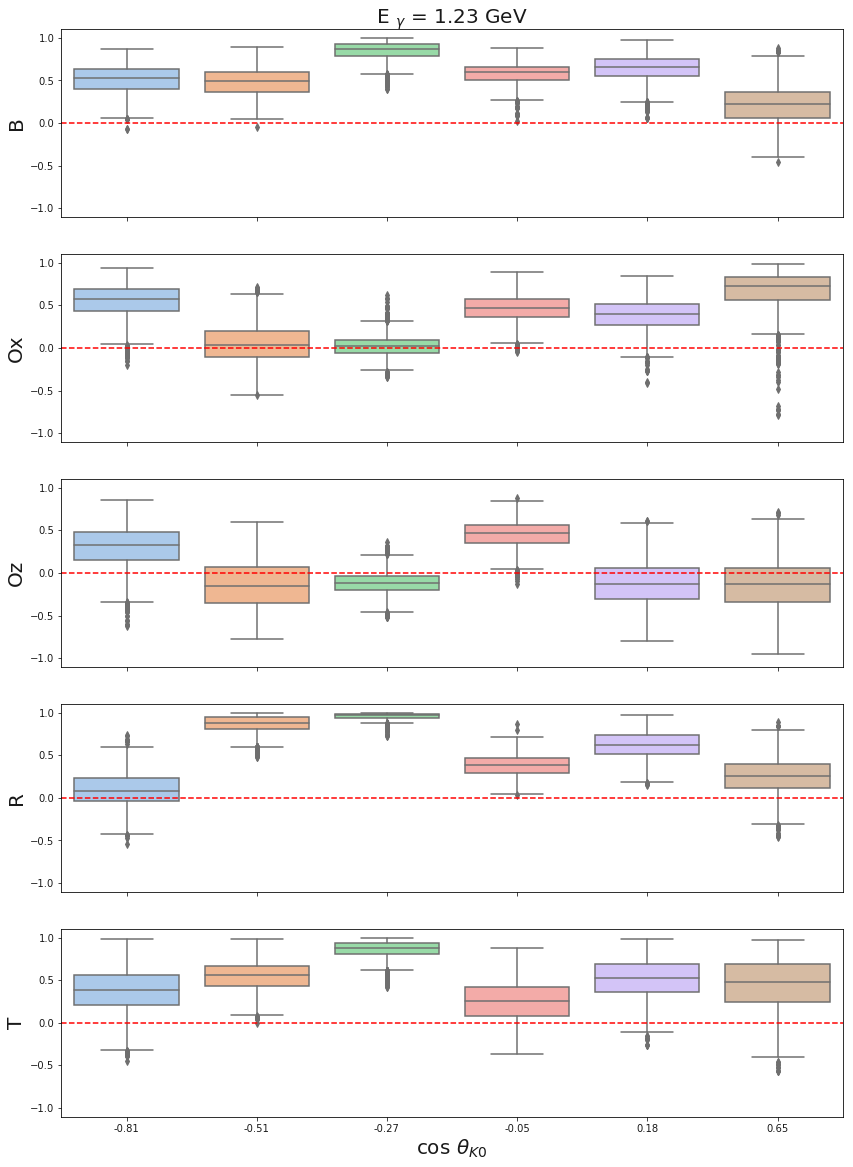

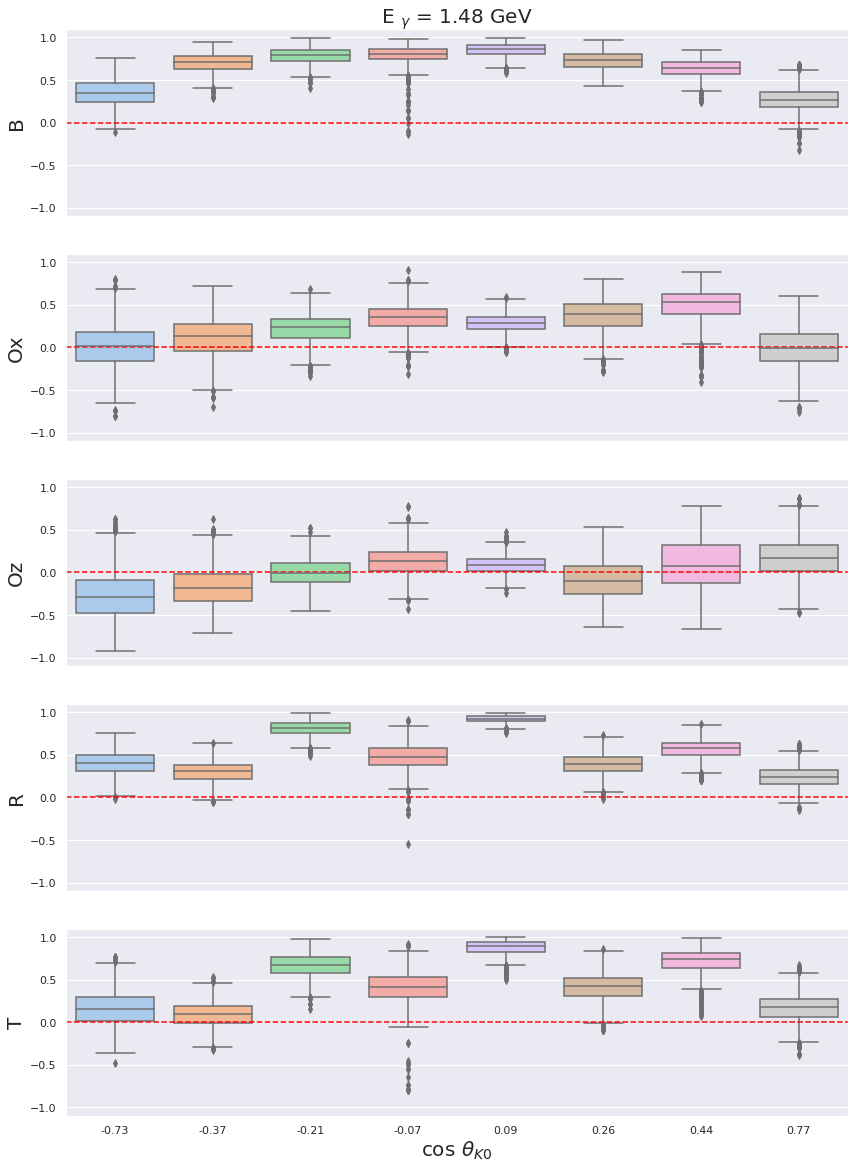

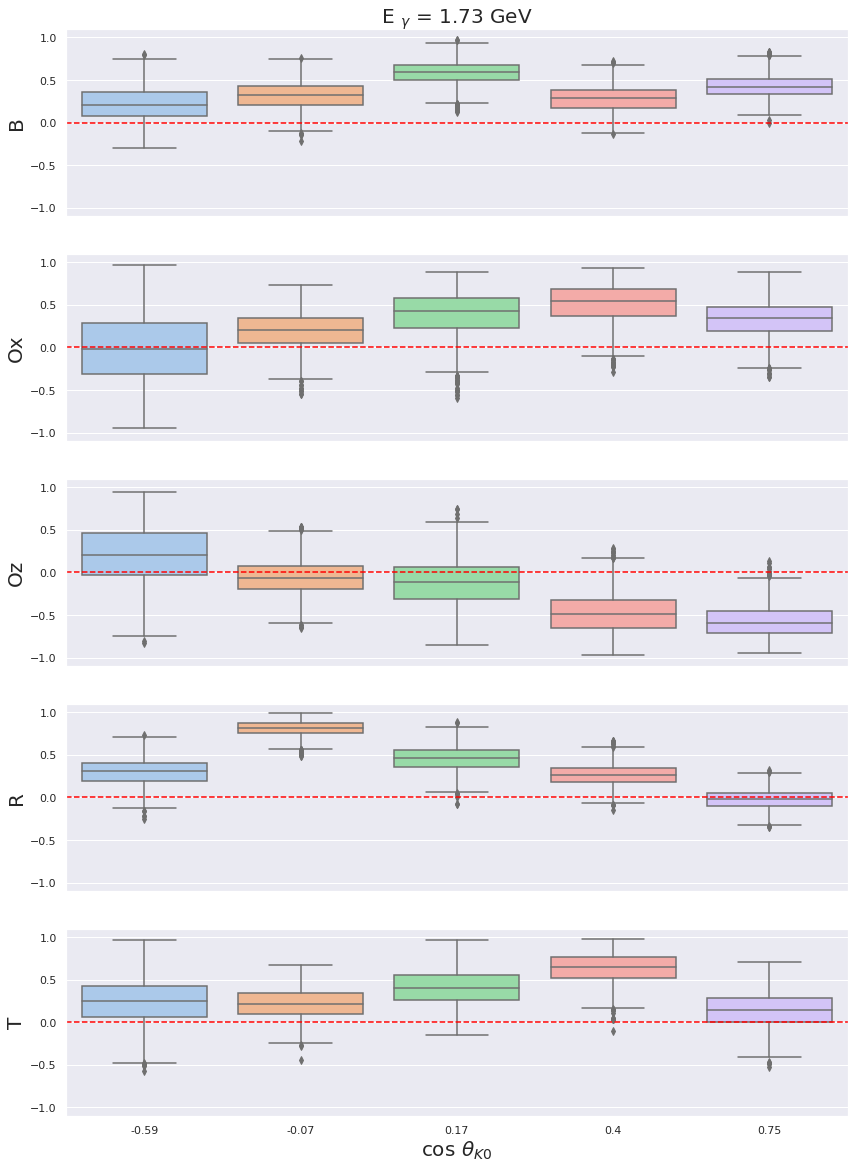

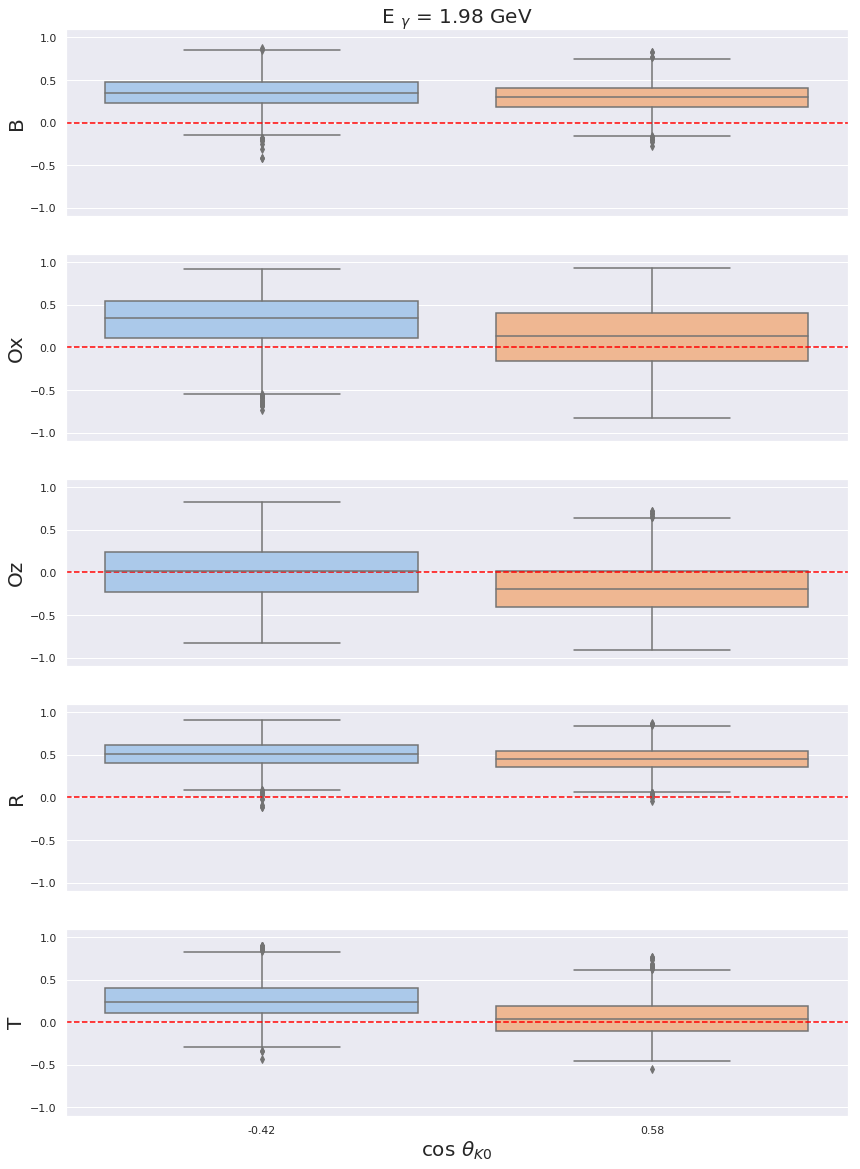

In [8]:
# Plot each bin and observable
# costh dependance

obs_labels = ['B','Ox','Oz','R','T']
n_obs = len(obs_labels)
Eg_bins = [1.23, 1.48, 1.73, 1.98]

for bin_idx in range(len(Eg_bins)):
    fig, ax = plt.subplots(n_obs, 1, sharex=True, figsize=(14,20))
    sns.set(palette="pastel")

    ax[0].set_title(r'E $_{\gamma}$ = ' + str(Eg_bins[bin_idx]) + ' GeV', fontsize=20)
    for i in range(n_obs):
        dfEg = csv_df[csv_df['Egamma']==Eg_bins[bin_idx]]
        dfObs = dfEg[dfEg['Obs']==obs_labels[i]]
        sns.boxplot(data=dfObs, x="costh", y="Val", ax=ax[i]) 

        ax[i].set_ylim(-1.1,1.1)
        ax[i].axhline(0.0,color='red',linestyle='--')
        ax[i].set_ylabel(obs_labels[i], fontsize=20)

        ax[i].set_xlabel('')

    ax[n_obs-1].set_xlabel(r'cos $\theta _{K0}$', fontsize=20)
    plt.show()
    

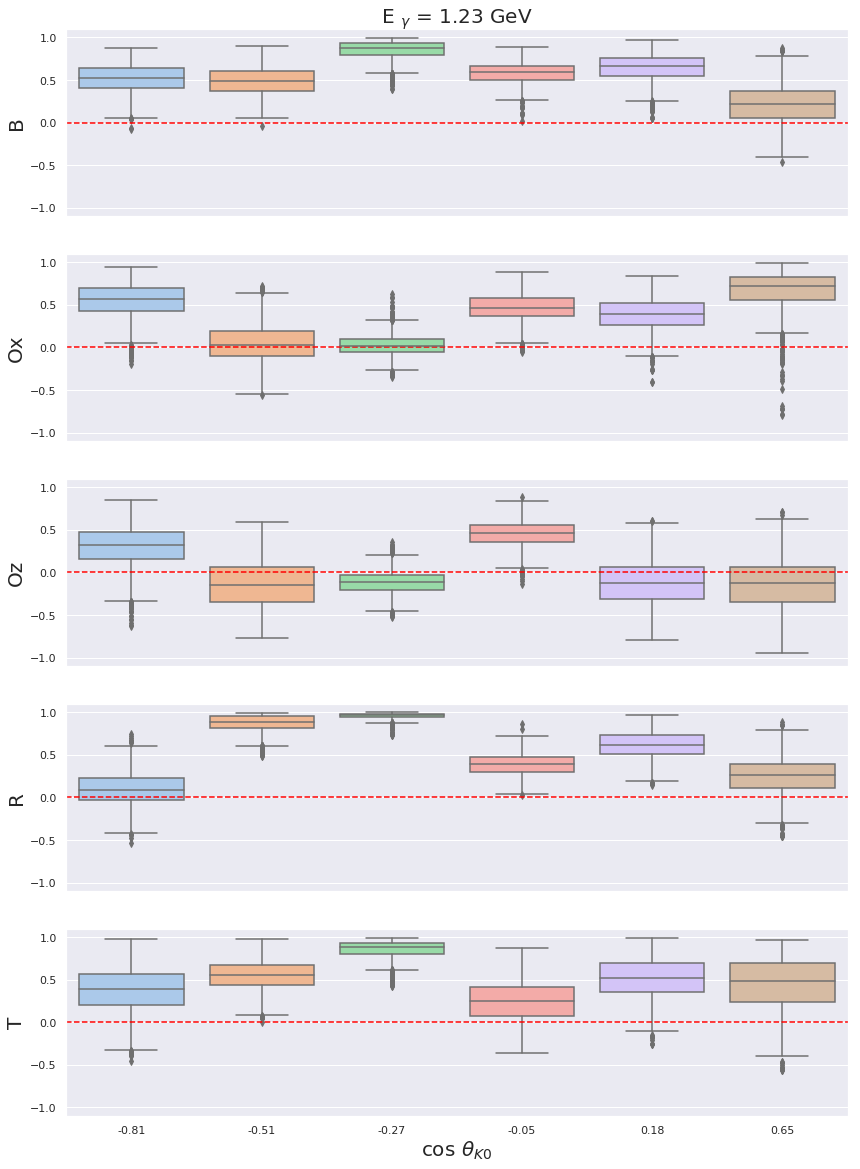

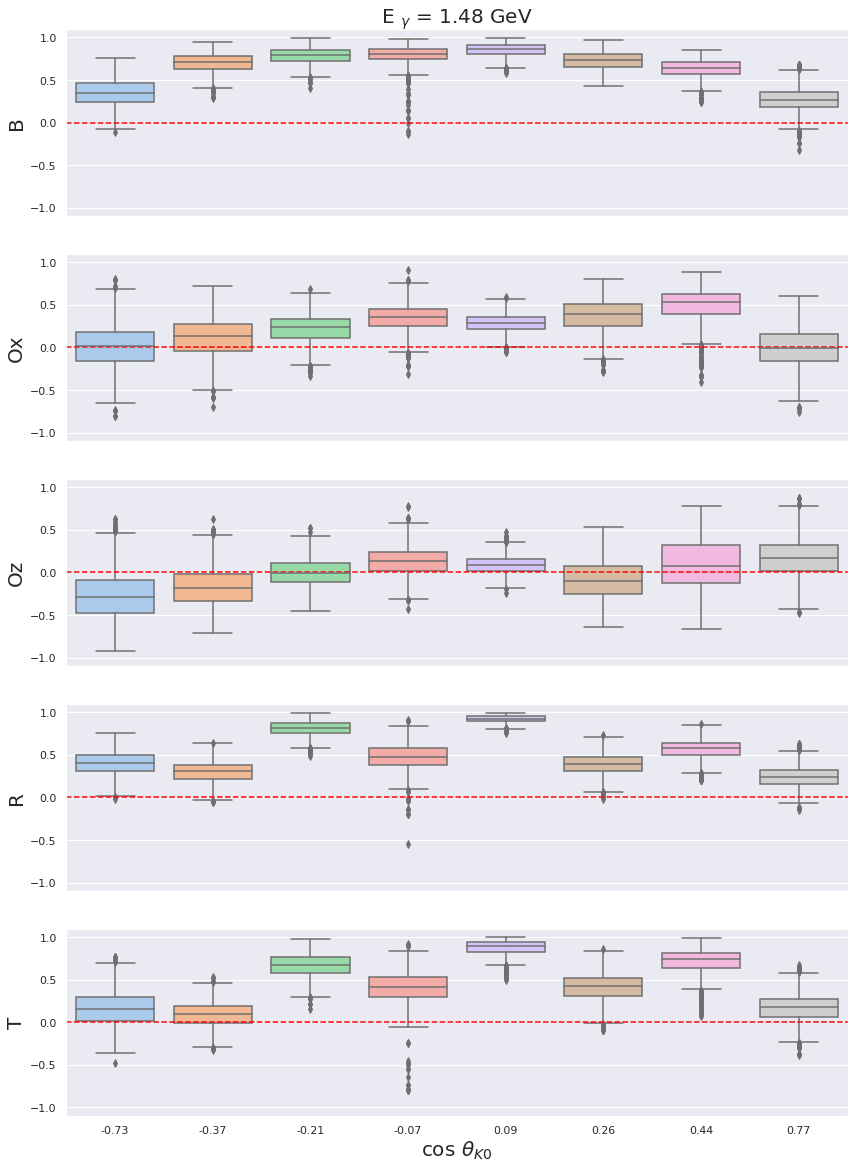

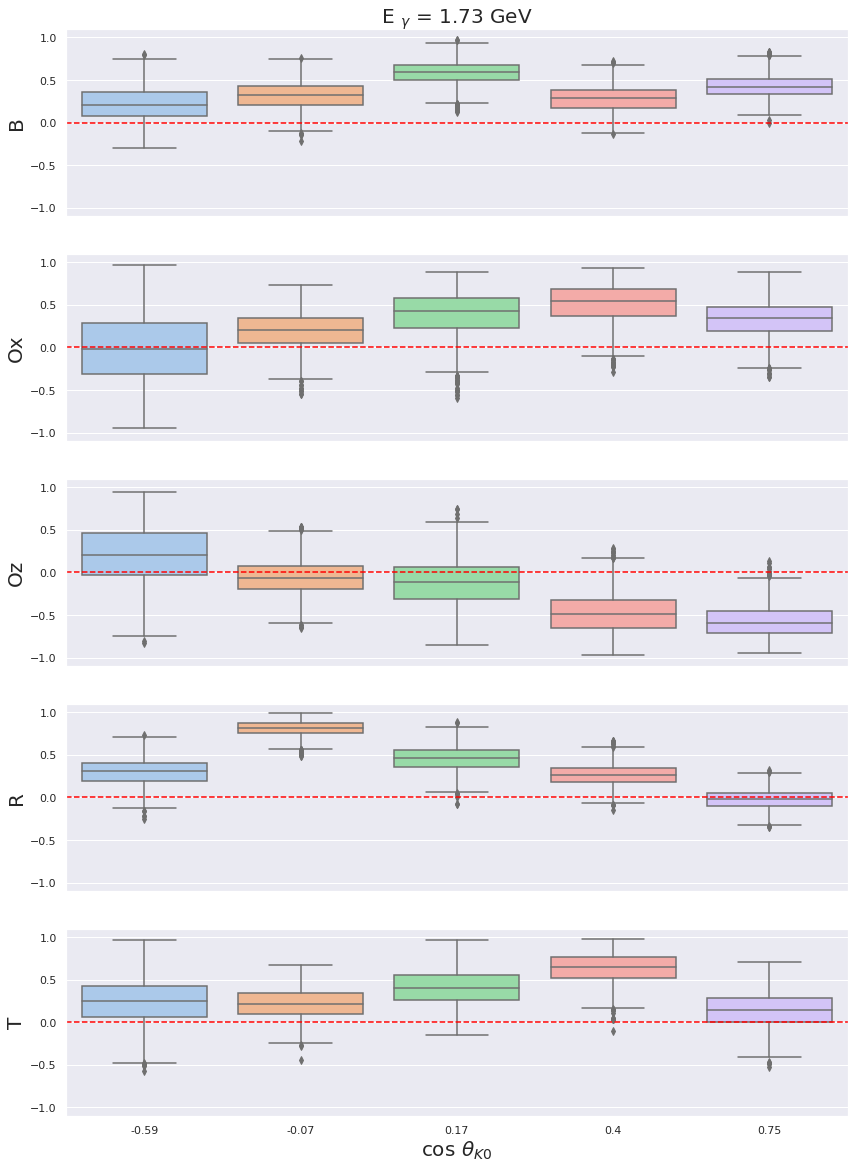

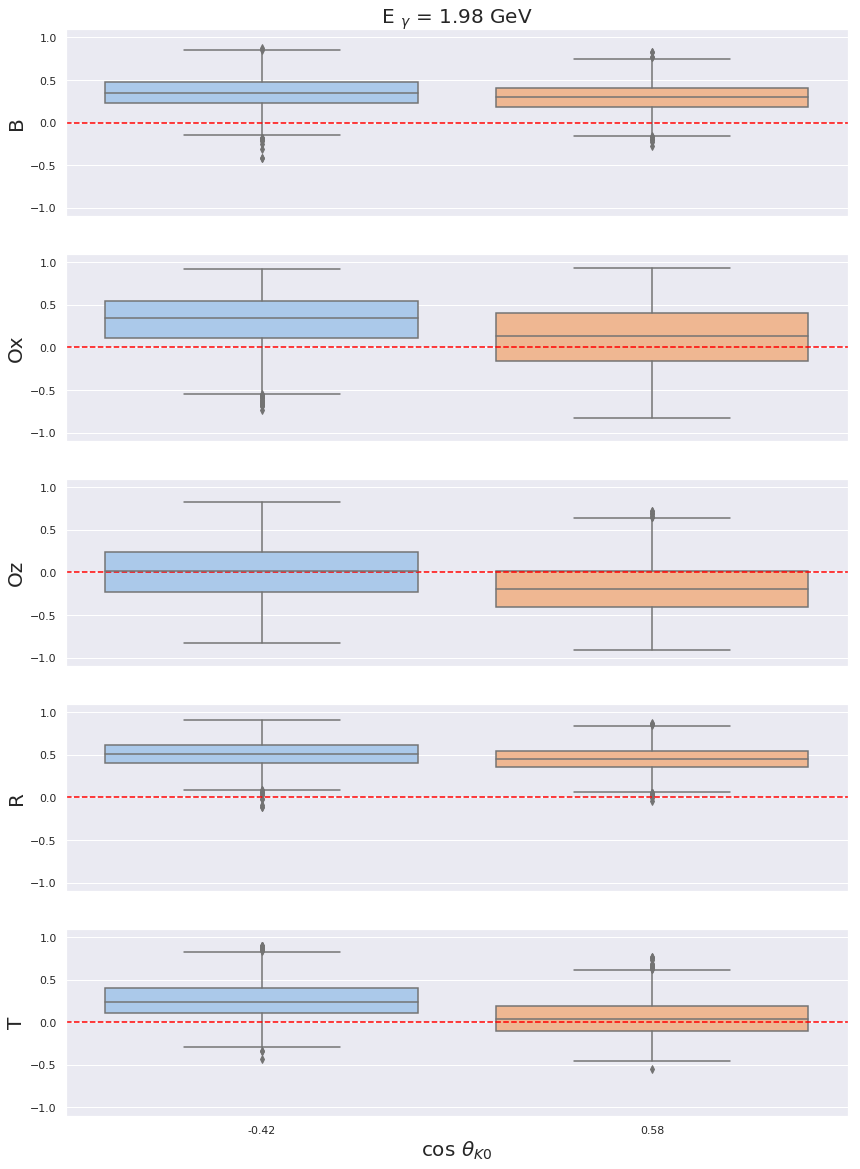

In [9]:
# Plot each bin and observable
# costh dependance

obs_labels = ['B','Ox','Oz','R','T']
n_obs = len(obs_labels)
Eg_bins = [1.23, 1.48, 1.73, 1.98]

for bin_idx in range(len(Eg_bins)):
    fig, ax = plt.subplots(n_obs, 1, sharex=True, figsize=(14,20))
    sns.set(palette="pastel")

    ax[0].set_title(r'E $_{\gamma}$ = ' + str(Eg_bins[bin_idx]) + ' GeV', fontsize=20)
    for i in range(n_obs):
        dfEg = csv_df[csv_df['Egamma']==Eg_bins[bin_idx]]
        dfObs = dfEg[dfEg['Obs']==obs_labels[i]]
        sns.boxplot(data=dfObs, x="costh", y="Val", ax=ax[i]) 

        ax[i].set_ylim(-1.1,1.1)
        ax[i].axhline(0.0,color='red',linestyle='--')
        ax[i].set_ylabel(obs_labels[i], fontsize=20)

        ax[i].set_xlabel('')

    ax[n_obs-1].set_xlabel(r'cos $\theta _{K0}$', fontsize=20)
    plt.show()
    

## cos $\theta _{K0}$ dependence for all E $_{\gamma}$ bins

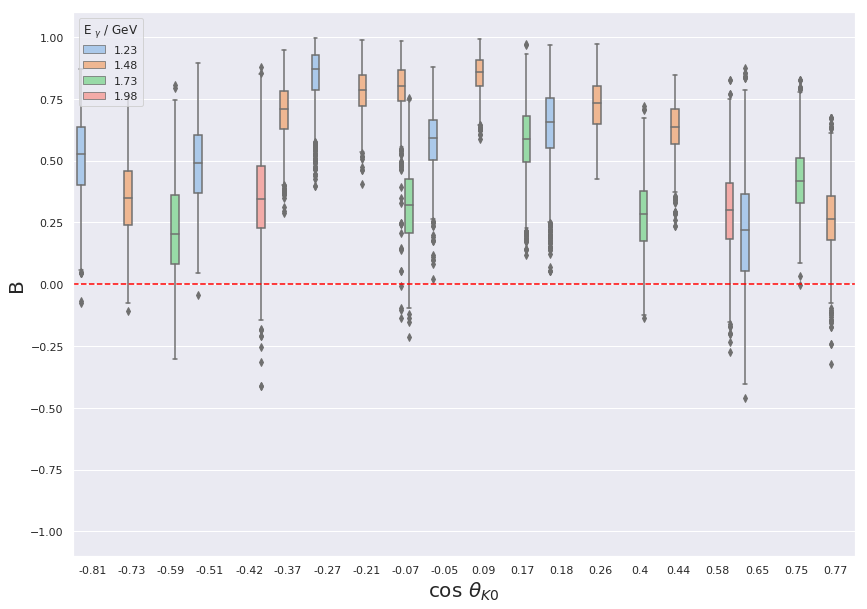

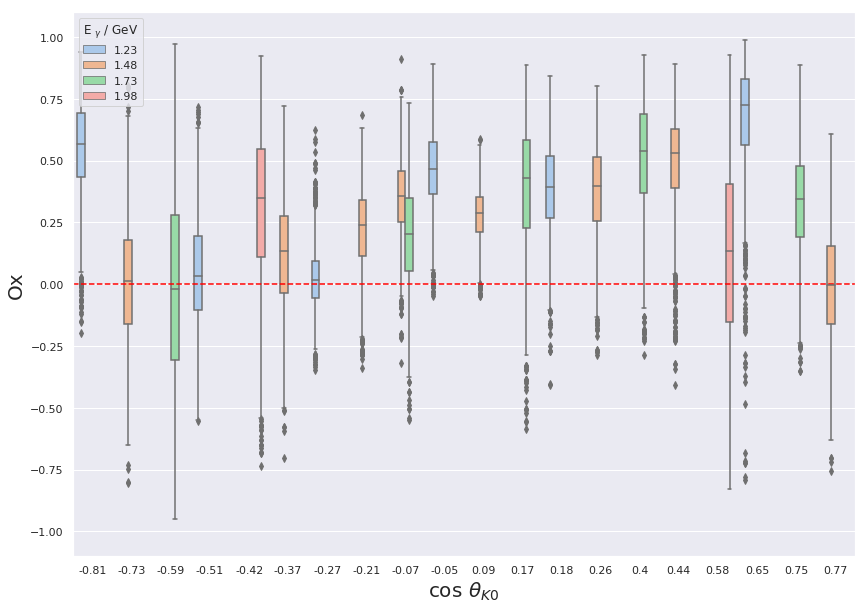

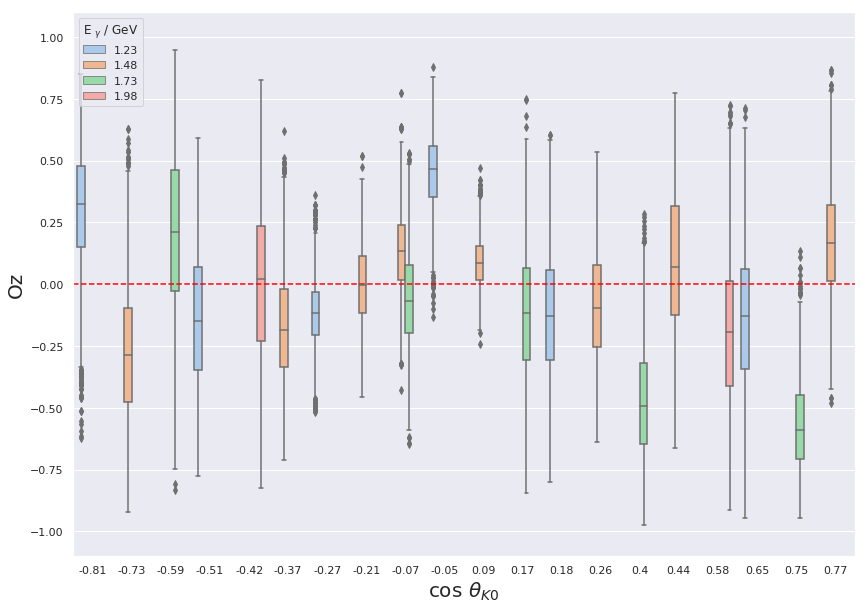

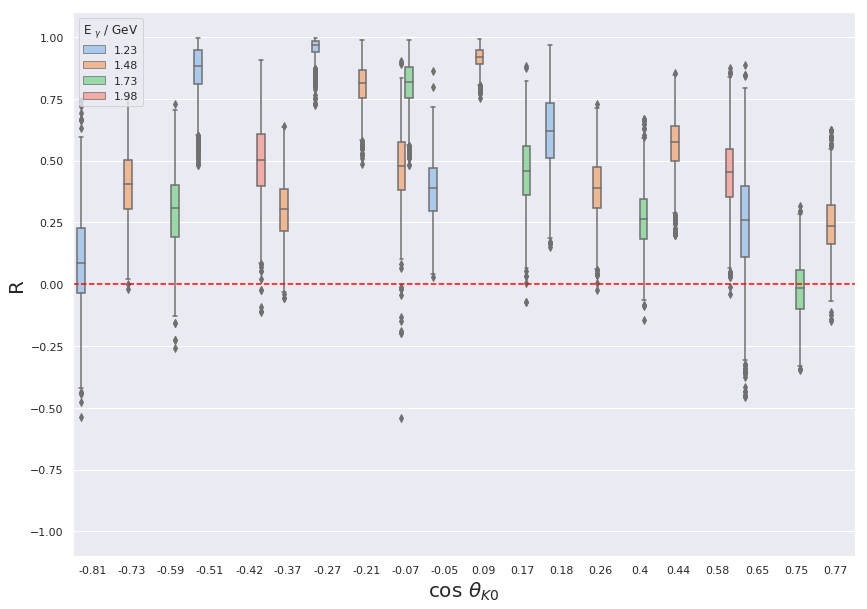

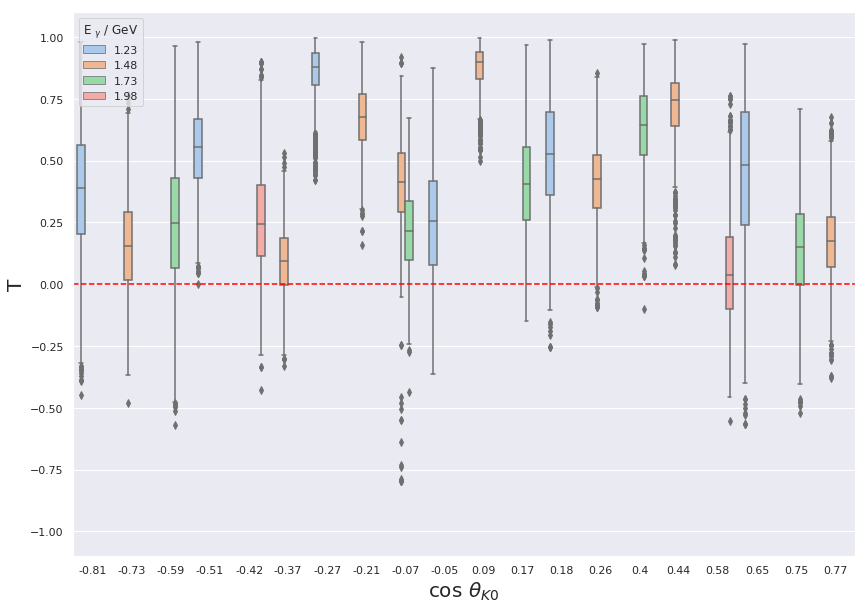

In [10]:
for i in range(n_obs):
    fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14,10))
    dfObs = csv_df[csv_df['Obs']==obs_labels[i]]
    sns.boxplot(data=dfObs, x="costh", y="Val", hue='Egamma') 
    ax.set_ylim(-1.1,1.1)
    ax.axhline(0.0,color='red',linestyle='--')
    ax.set_ylabel(obs_labels[i], fontsize=20)

    ax.legend(loc="upper left", title=r'E $_{\gamma}$ / GeV')
    ax.set_xlabel(r'cos $\theta _{K0}$', fontsize=20)     
    plt.show()
    


## E $_{\gamma}$ dependence for all cos $\theta _{K0}$ bins

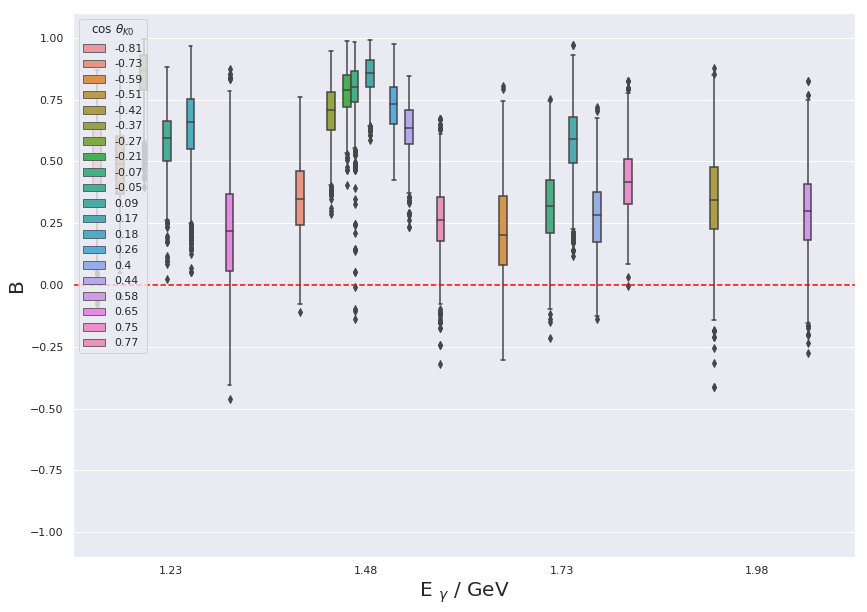

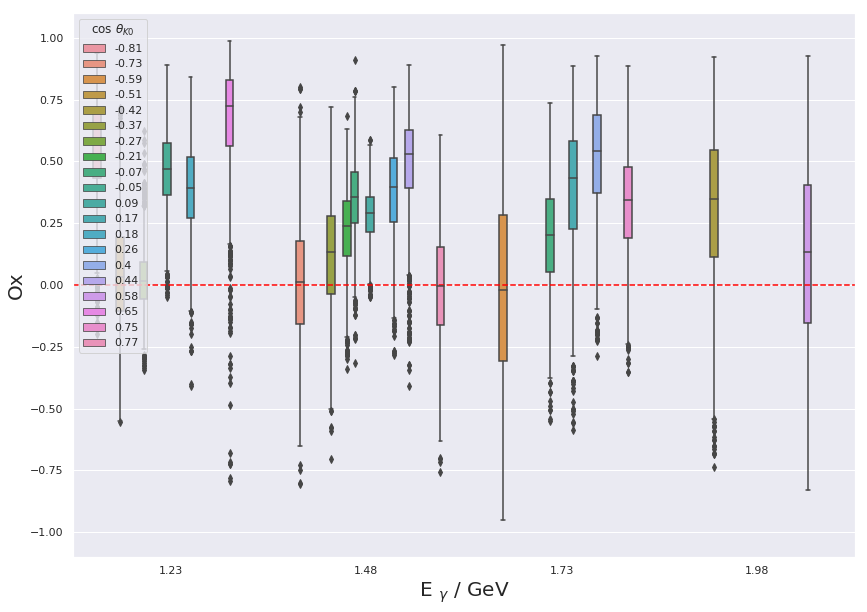

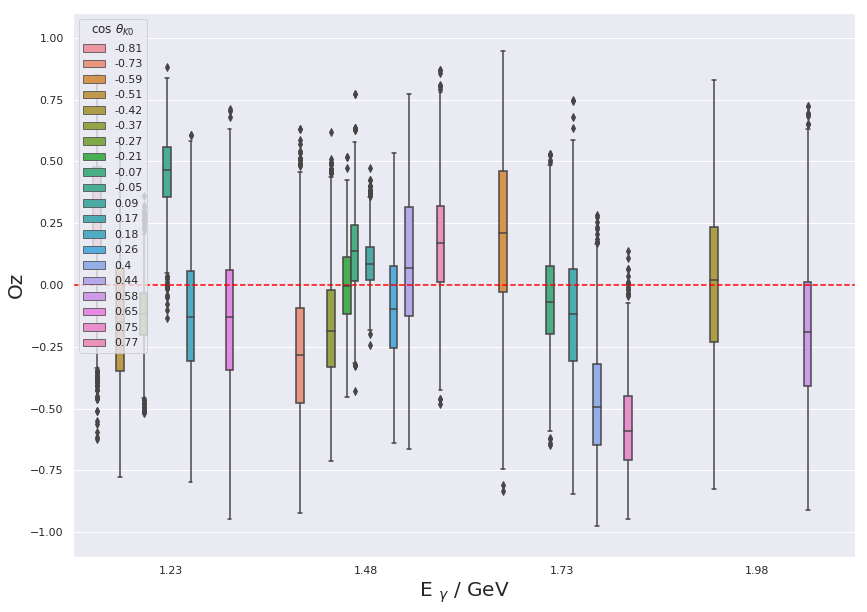

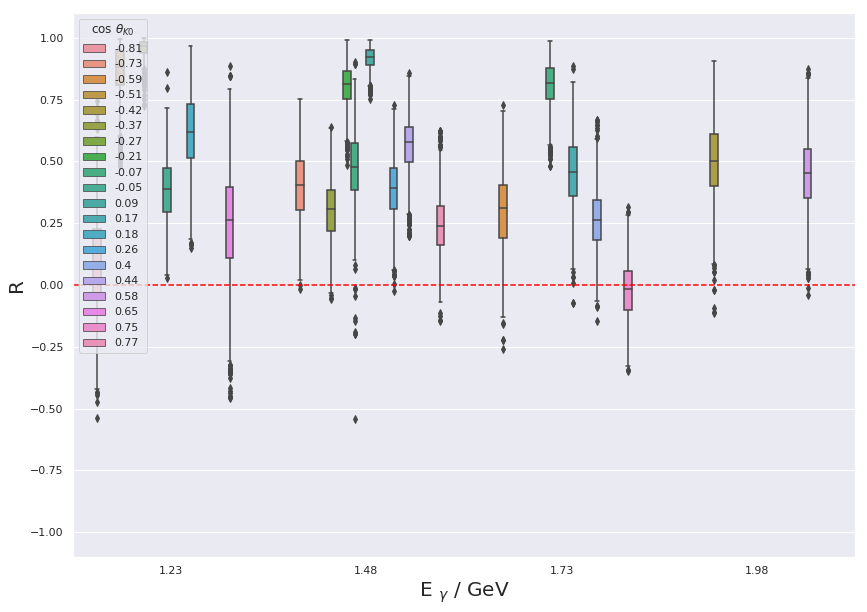

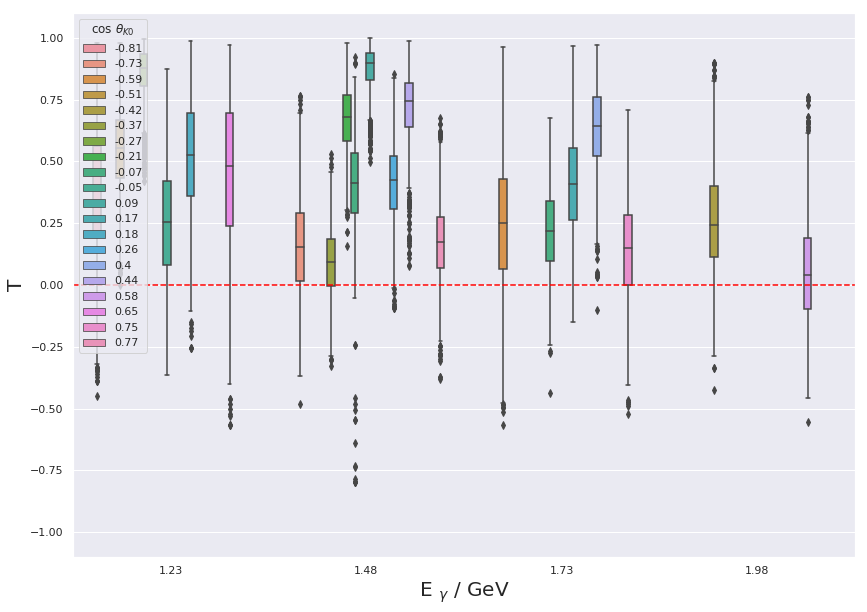

In [11]:
# Plot each bin and observable
# Egamma dependance
for i in range(n_obs):
    fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14,10))
    dfObs = csv_df[csv_df['Obs']==obs_labels[i]]
    sns.boxplot(data=dfObs, x="Egamma", y="Val", hue='costh') 
    ax.set_ylim(-1.1,1.1)
    ax.axhline(0.0,color='red',linestyle='--')
    ax.set_ylabel(obs_labels[i], fontsize=20)

    ax.legend(loc="upper left", title=r'cos $\theta _{K0}$')
    ax.set_xlabel(r'E $_{\gamma}$ / GeV', fontsize=20)     
    plt.show()
    

## Corner plots for all bins

In [12]:
# combine the rows into 1 row with 5 values

# get the bin
dfEg = csv_df[csv_df['Egamma']==1.23]
dfCosth = dfEg[dfEg['costh']==-0.81]

# get df for each obs
dfB = dfCosth[dfCosth['Obs']=='B']
dfB = dfB.reset_index()
dfOx = dfCosth[dfCosth['Obs']=='Ox']
dfOx = dfOx.reset_index()
dfOz = dfCosth[dfCosth['Obs']=='Oz']
dfOz = dfOz.reset_index()
dfR = dfCosth[dfCosth['Obs']=='R']
dfR = dfR.reset_index()
dfT = dfCosth[dfCosth['Obs']=='T']
dfT = dfT.reset_index()

# merge them
pd.concat([dfB['Val'], dfOx['Val'], dfOz['Val'], dfR['Val'], dfT['Val']], 
          axis=1, keys=['B','Ox','Oz','R','T'])


B        Ox        Oz         R         T
0     0.313504  0.517362  0.278089 -0.199418  0.429268
1     0.224835  0.471809  0.403161 -0.253462  0.467796
2     0.249209  0.539960 -0.384091 -0.238606  0.457205
3     0.048240  0.768424 -0.459372 -0.034799  0.847265
4     0.044814  0.768333 -0.452317 -0.031324  0.853915
5    -0.075746  0.654889 -0.233180  0.087679  0.639995
6    -0.068025  0.610483 -0.245231  0.079872  0.628224
7     0.205191  0.322285 -0.351641  0.396445  0.519235
8     0.205191  0.322285 -0.351641  0.396445  0.519235
9     0.045066  0.515435 -0.206948  0.476635  0.317385
10    0.045066  0.515435 -0.206948  0.476635  0.317385
11    0.045066  0.515435 -0.206948  0.476635  0.317385
12    0.220352  0.431059 -0.312586  0.388852  0.538347
13    0.220352  0.431059 -0.312586  0.388852  0.538347
14    0.302091  0.584732 -0.124451  0.452925  0.586747
15    0.469814  0.709005 -0.258385  0.382457  0.791136
16    0.469814  0.709005 -0.258385  0.382457  0.791136
17    0.590025  0.722754 -0.063470  0.522474  0.838493
18    0.587092  0.763608 -0.080953  0.533363  0.851642
19    0.648974  0.570705 -0.233242  0.303562  0.574142
20    0.621619  0.540727  0.037862  0.315115  0.548029
21    0.633435  0.546093  0.019551  0.310125  0.559308
22    0.433037  0.385061  0.618499 -0.067023  0.318386
23    0.433037  0.385061  0.618499 -0.067023  0.318386
24    0.587967  0.558772  0.092451  0.224554  0.504645
25    0.692399  0.461291  0.225571  0.305087  0.472068
26    0.714890  0.531497  0.248528  0.209664  0.364437
27    0.707926  0.535681  0.258197  0.212874  0.358897
28    0.707926  0.535681  0.258197  0.212874  0.358897
29    0.657420  0.527108  0.387368  0.076761  0.248035
...        ...       ...       ...       ...       ...
1970  0.662321  0.570235  0.381550  0.198149  0.513829
1971  0.582885  0.510296  0.483558  0.009519  0.399460
1972  0.604356  0.487145  0.478829 -0.042446  0.327423
1973  0.604356  0.487145  0.478829 -0.042446  0.327423
1974  0.486309  0.562874  0.632454  0.243255  0.723481
1975  0.511645  0.450102  0.614399  0.181936  0.638477
1976  0.378122  0.488707  0.660179  0.077537  0.670410
1977  0.610118  0.320597  0.681301  0.421669  0.793366
1978  0.610118  0.320597  0.681301  0.421669  0.793366
1979  0.605910  0.323531  0.685243  0.437014  0.812723
1980  0.590970  0.330304  0.675688  0.491491  0.881444
1981  0.590970  0.330304  0.675688  0.491491  0.881444
1982  0.615633  0.316673  0.675615  0.401560  0.768000
1983  0.701951  0.327698  0.511197  0.086810  0.370958
1984  0.515357  0.367685  0.617517 -0.032343  0.439923
1985  0.478287  0.386312  0.666218  0.041672  0.550061
1986  0.418017  0.604720  0.529576 -0.000797  0.568405
1987  0.452658  0.570623  0.510325 -0.060271  0.475051
1988  0.452658  0.570623  0.510325 -0.060271  0.475051
1989  0.568414  0.453760  0.427093 -0.259013  0.163095
1990  0.552054  0.494546  0.492440 -0.245880  0.150963
1991  0.552054  0.494546  0.492440 -0.245880  0.150963
1992  0.577460  0.177596  0.652477 -0.233535  0.137065
1993  0.637383  0.188566  0.557573 -0.342233 -0.024191
1994  0.515250  0.242900  0.605412 -0.120689  0.304473
1995  0.515250  0.242900  0.605412 -0.120689  0.304473
1996  0.515250  0.242900  0.605412 -0.120689  0.304473
1997  0.574997  0.365660  0.573396  0.017439  0.390199
1998  0.575618  0.365622  0.580118  0.015953  0.388169
1999  0.503742  0.738324  0.246582 -0.030392  0.416079

[2000 rows x 5 columns]

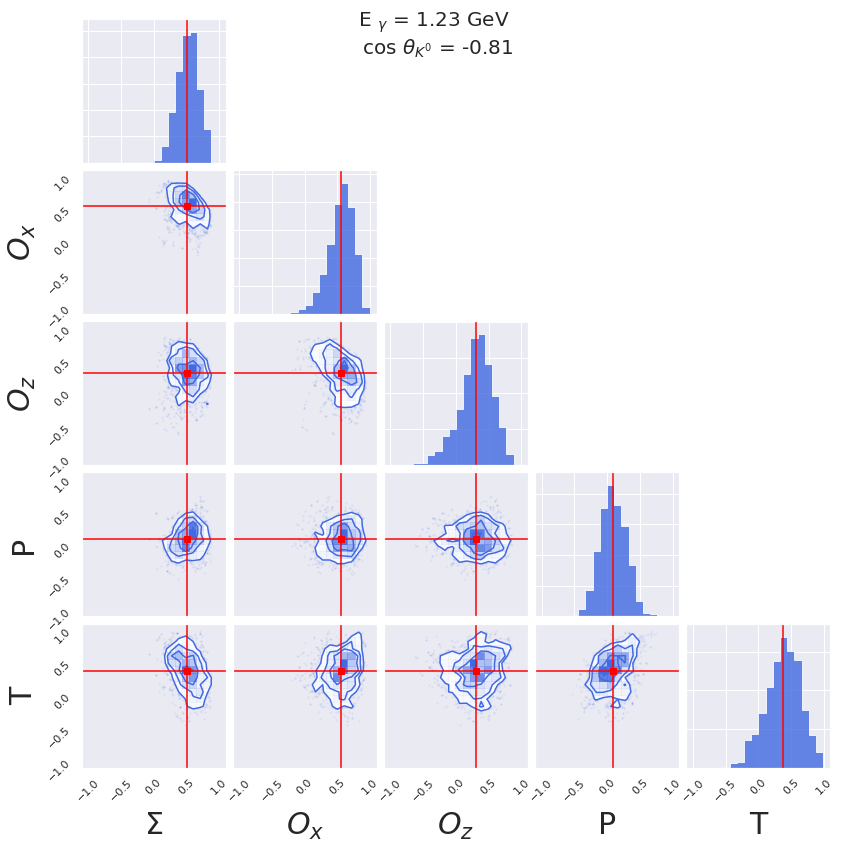

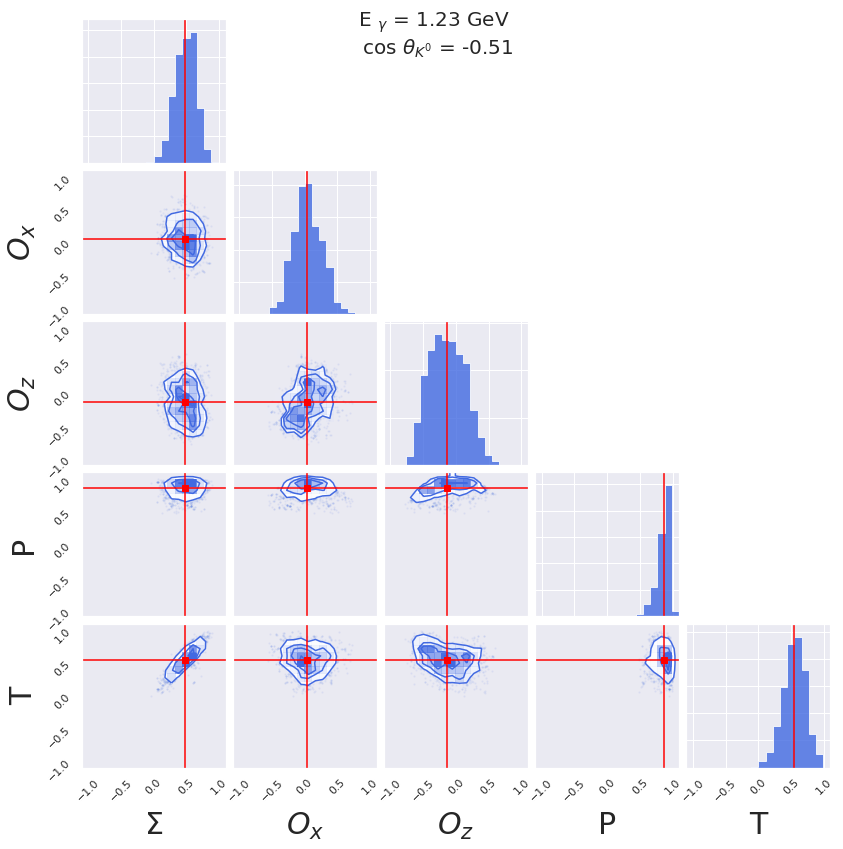

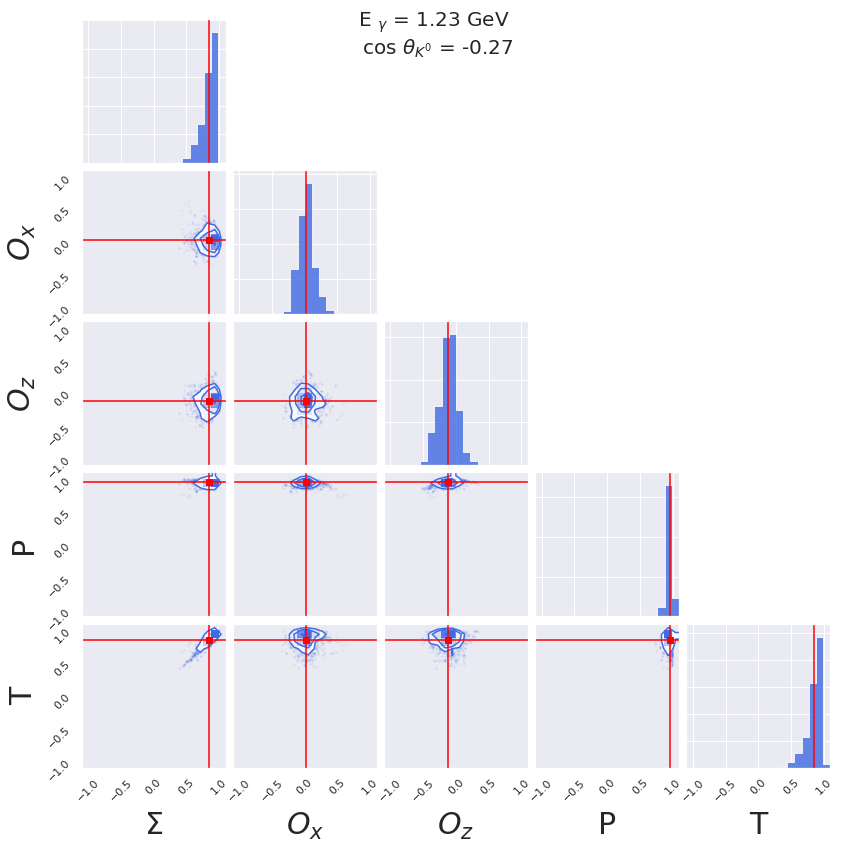

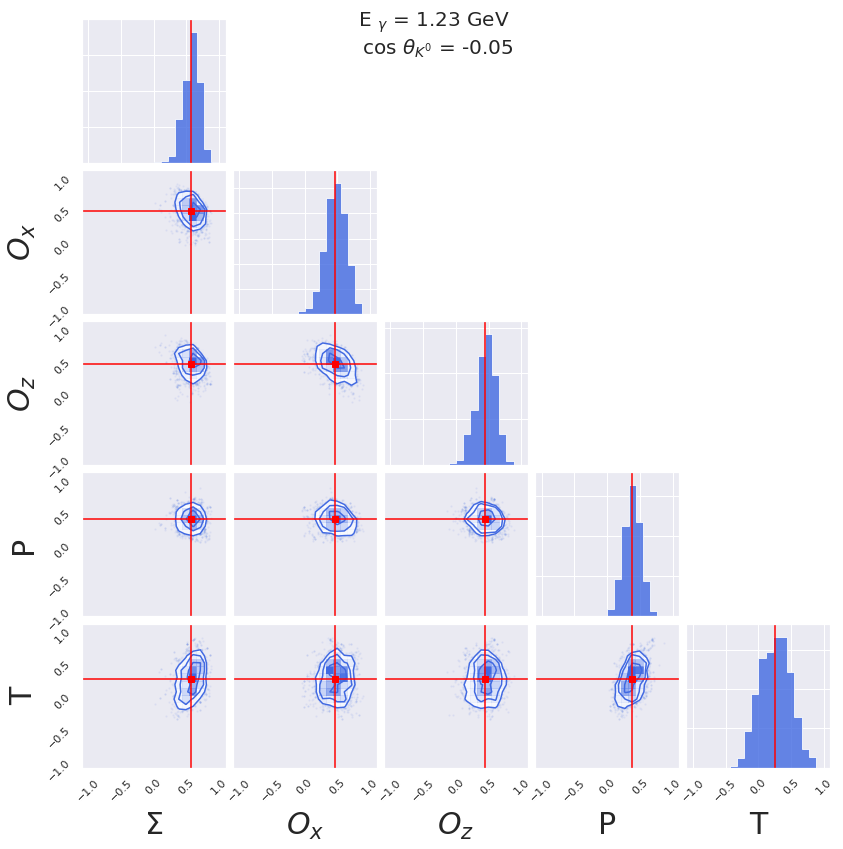

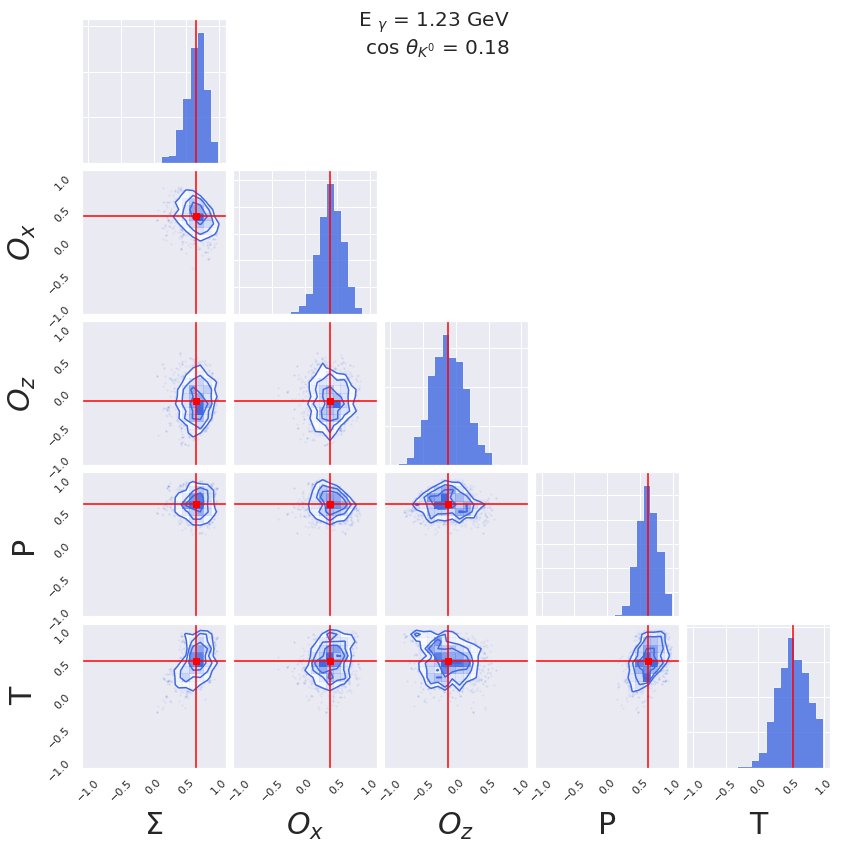

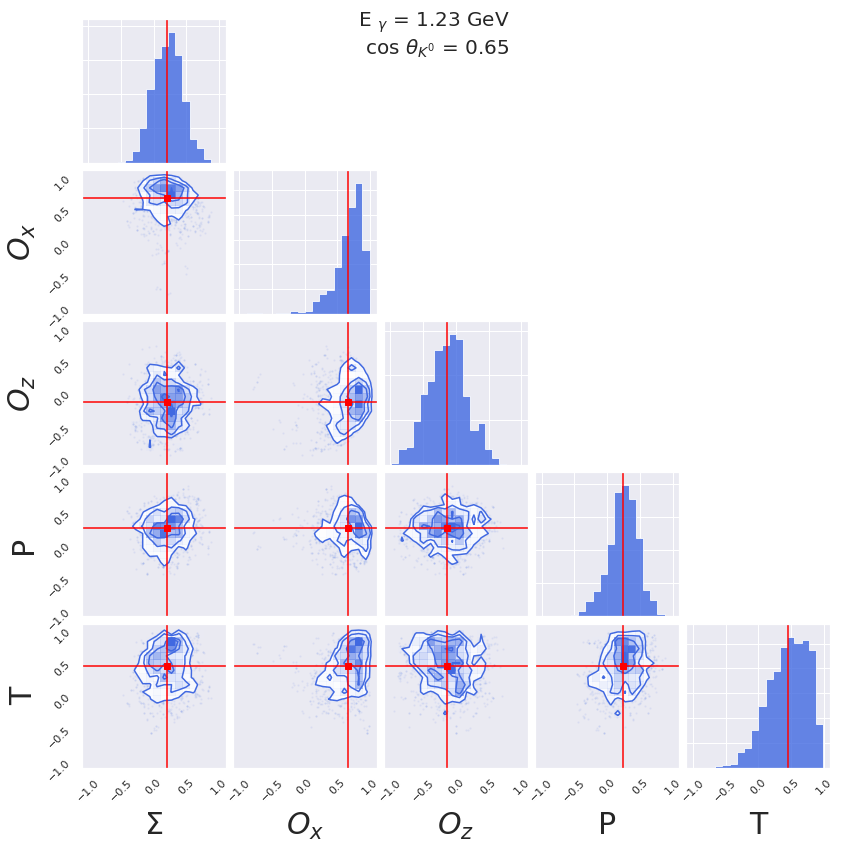

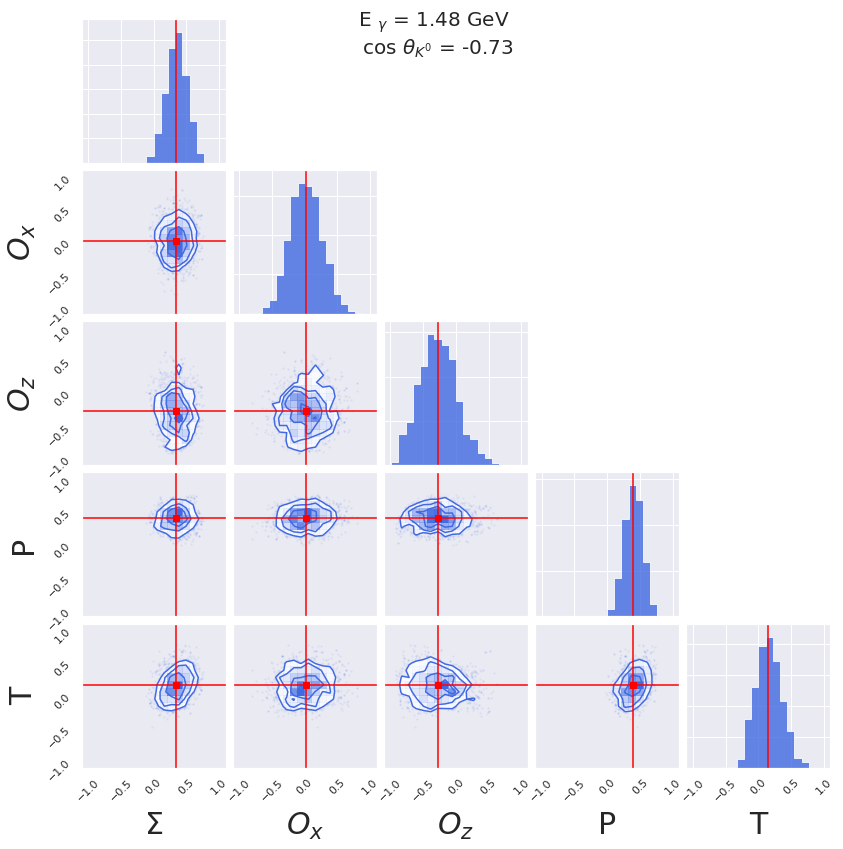

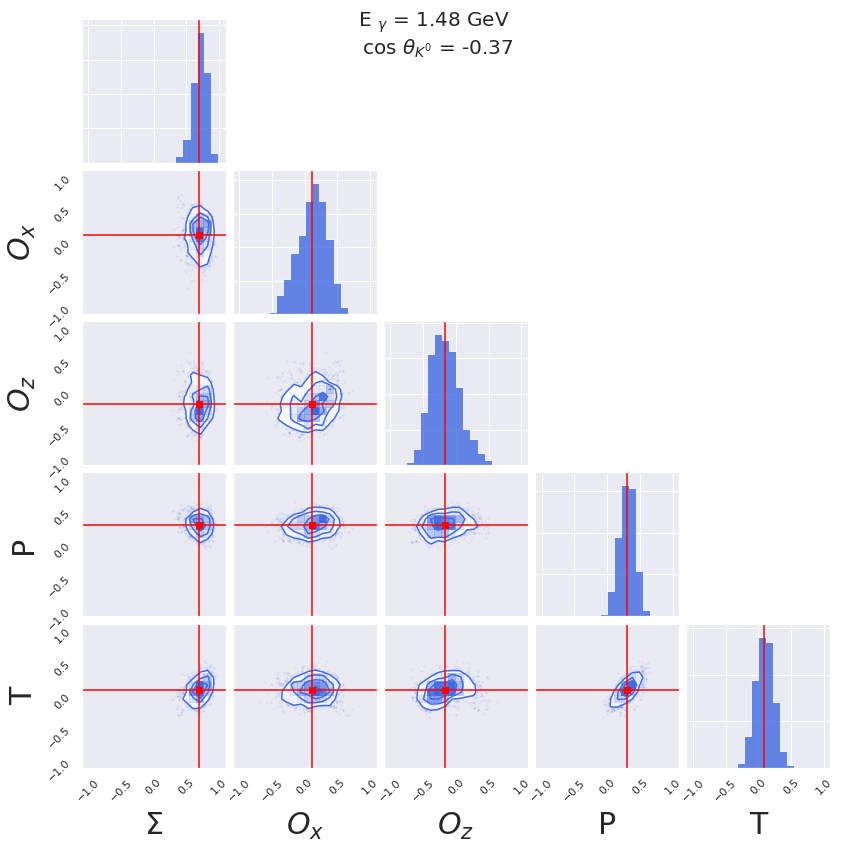

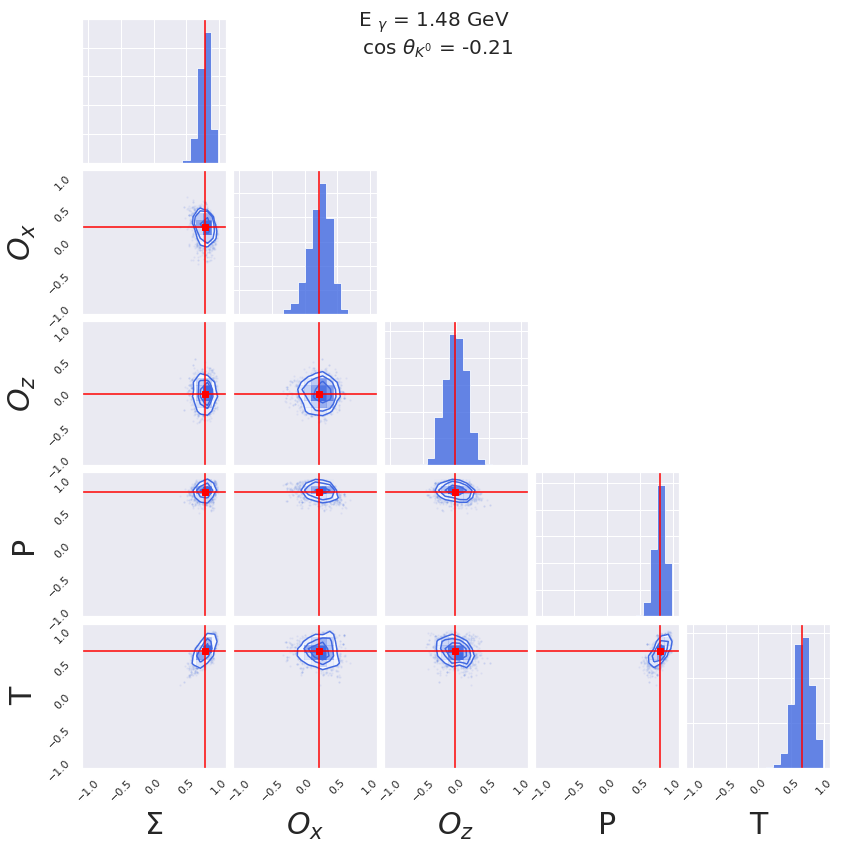

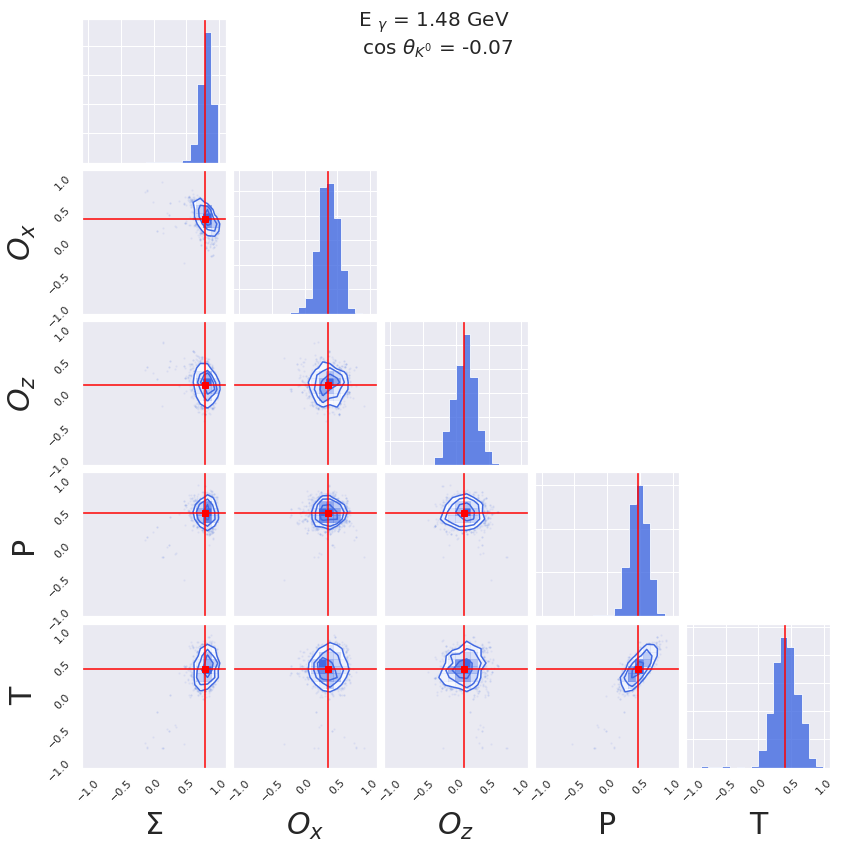

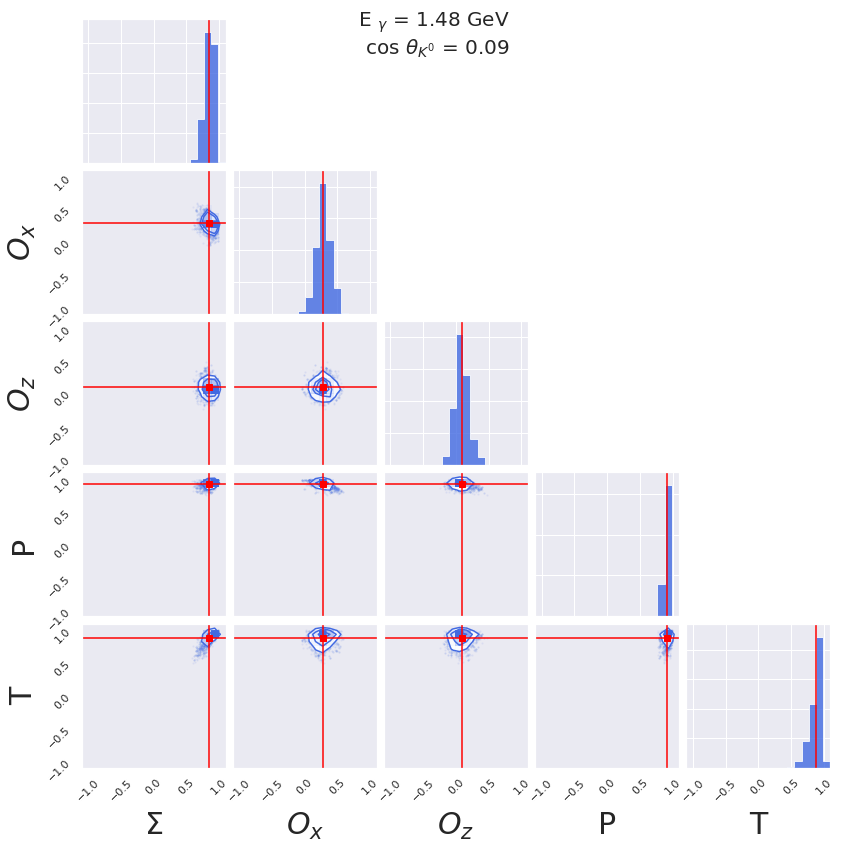

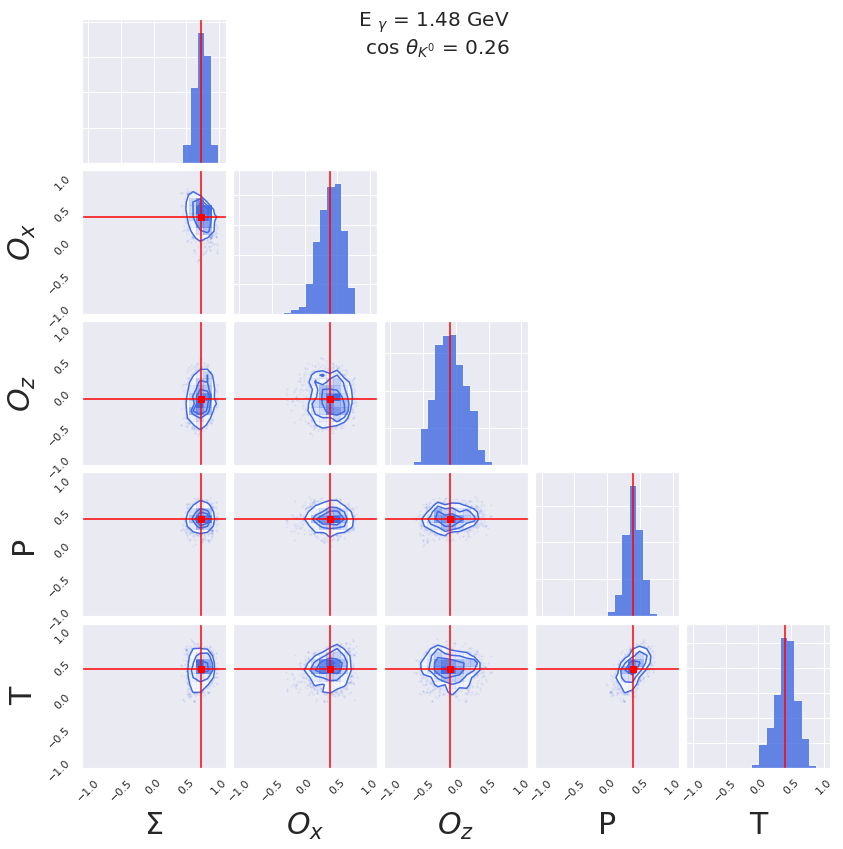

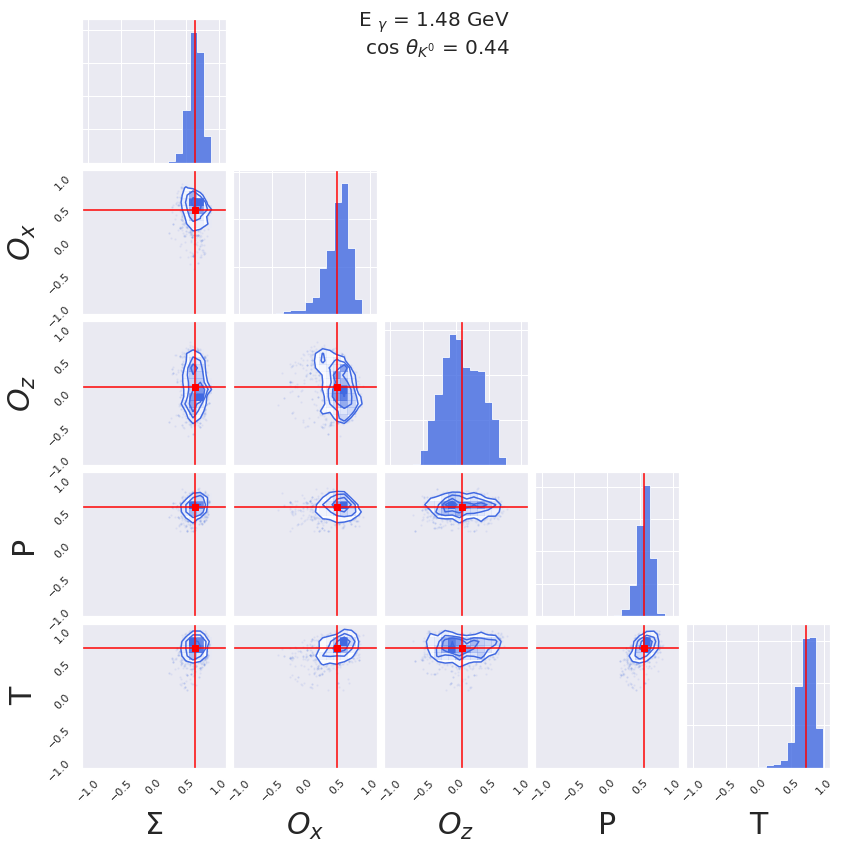

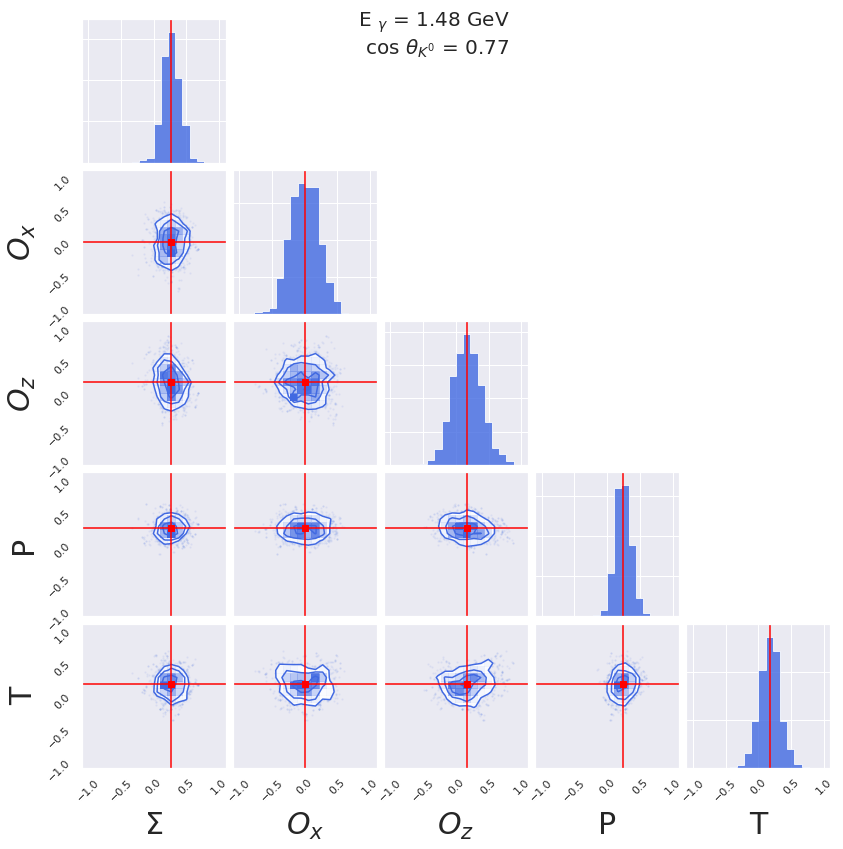

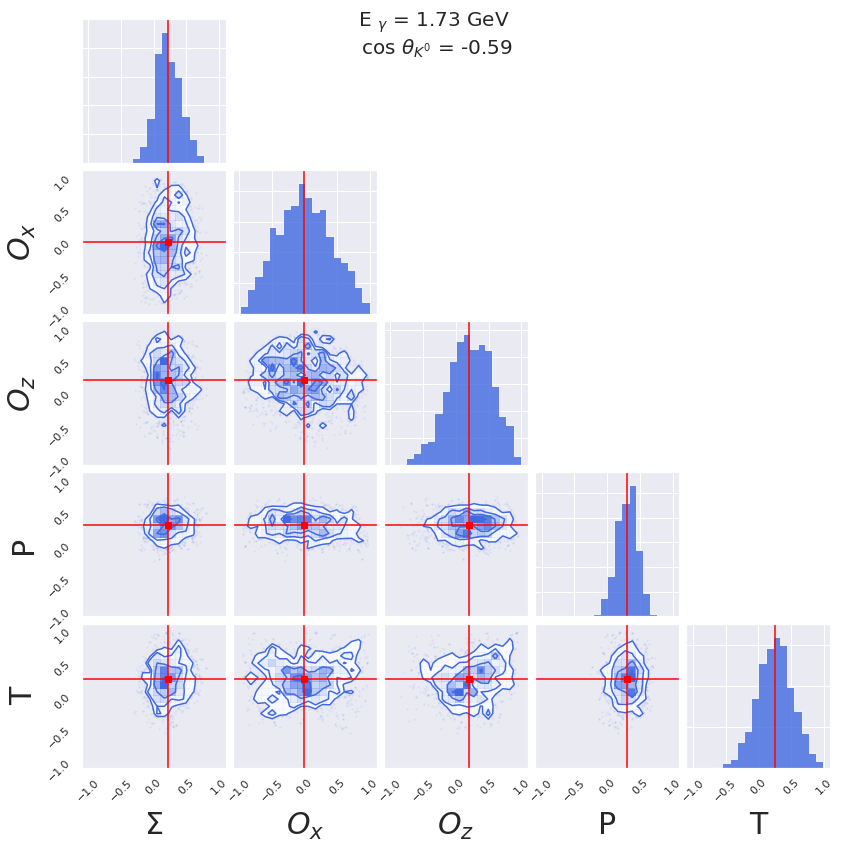

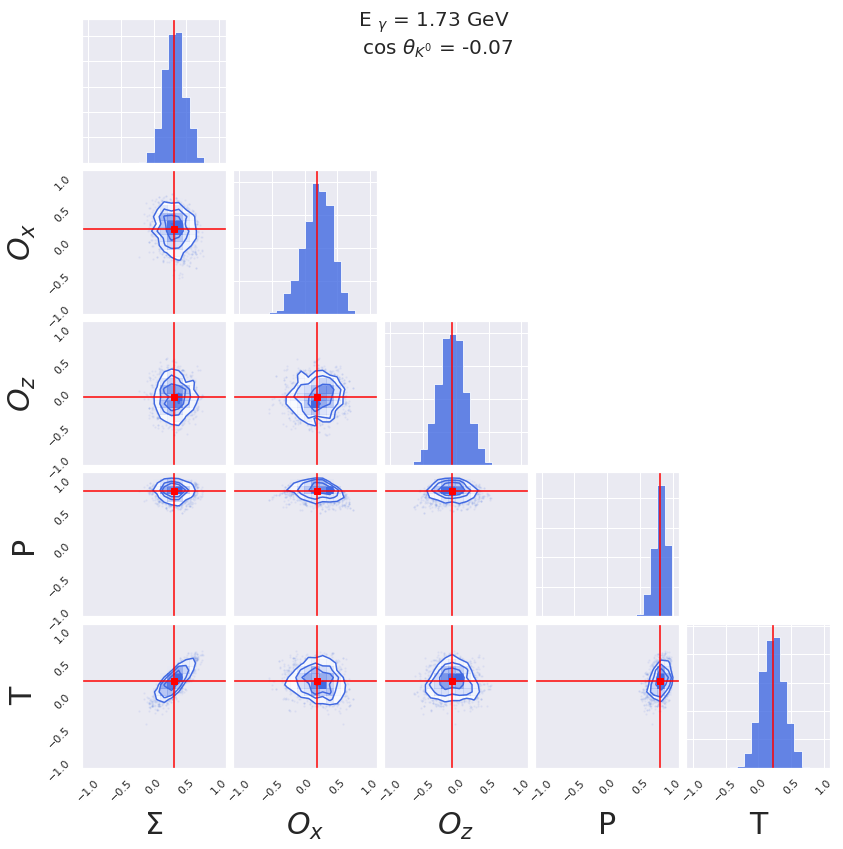

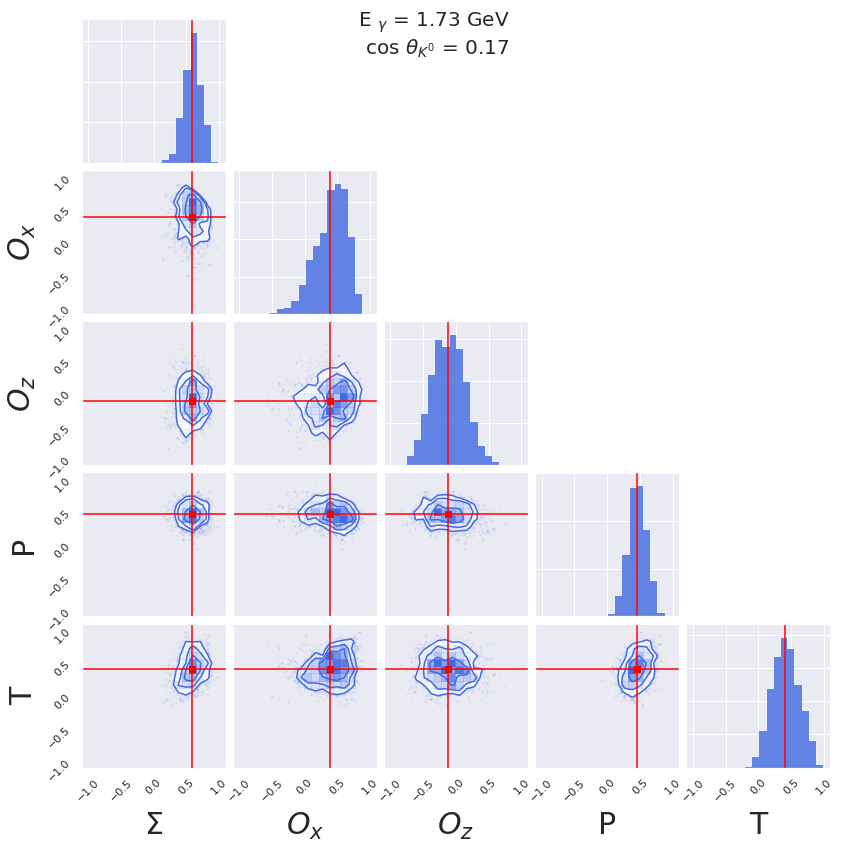

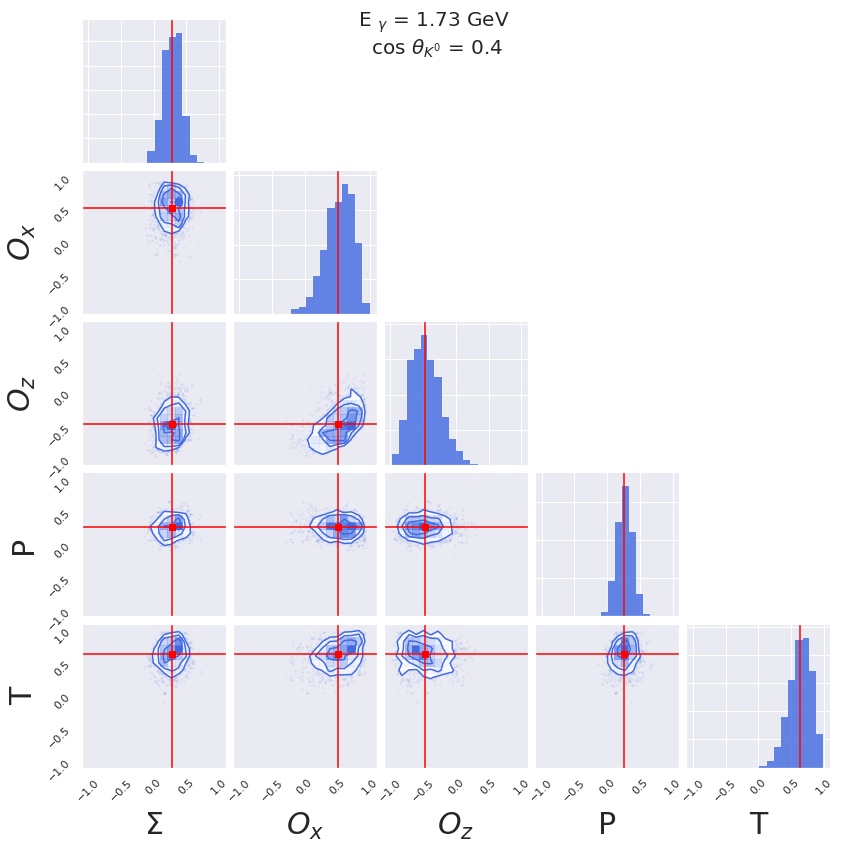

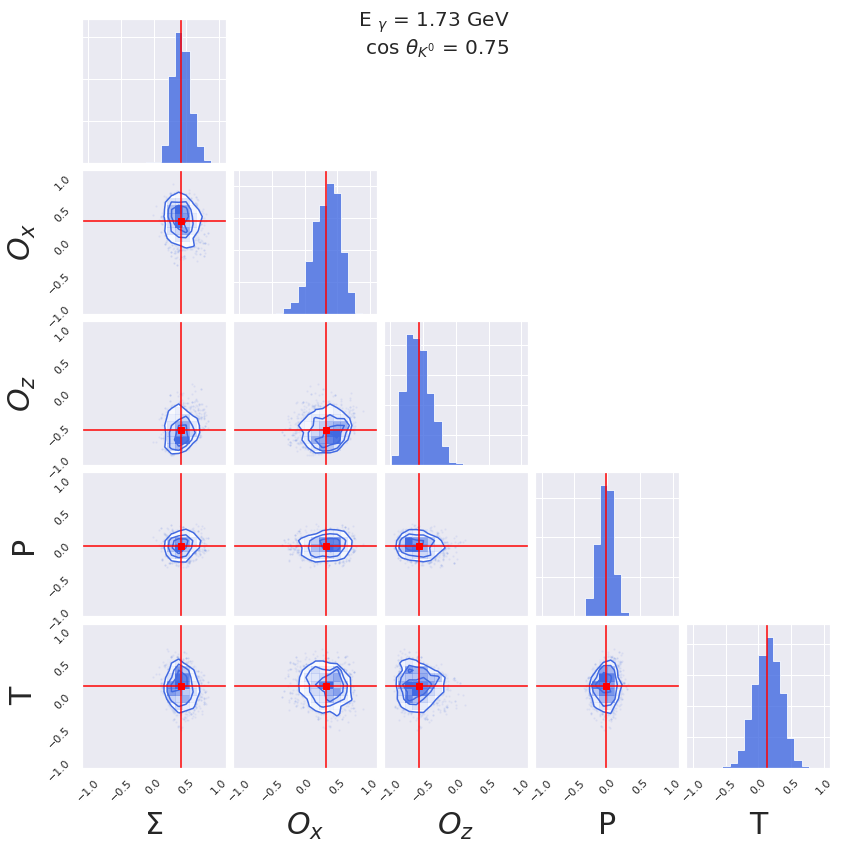

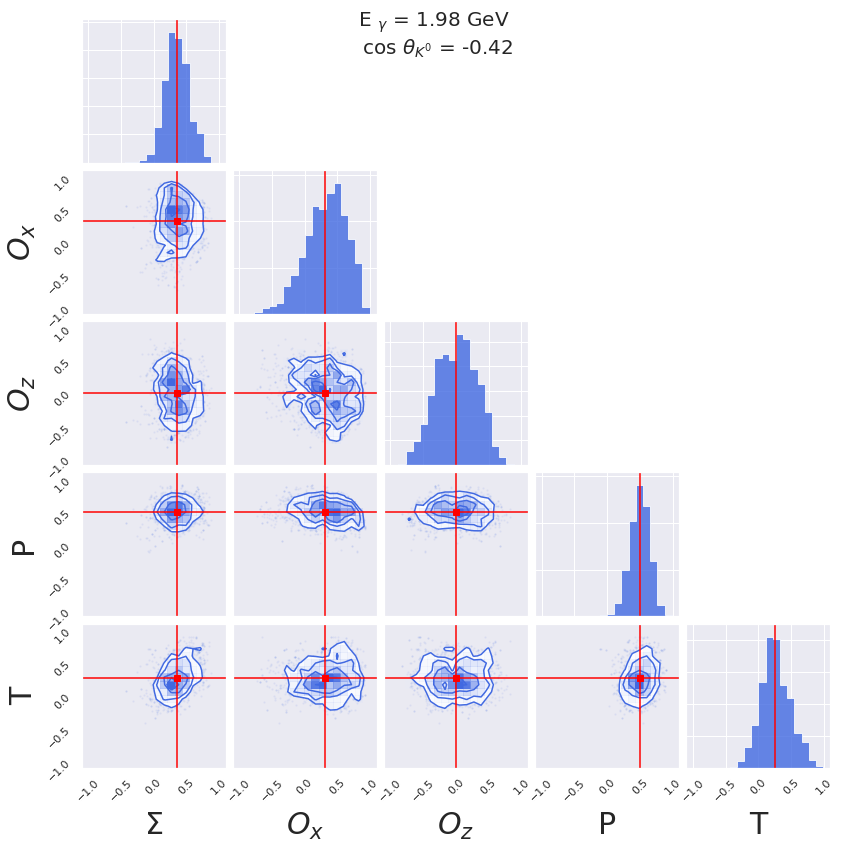

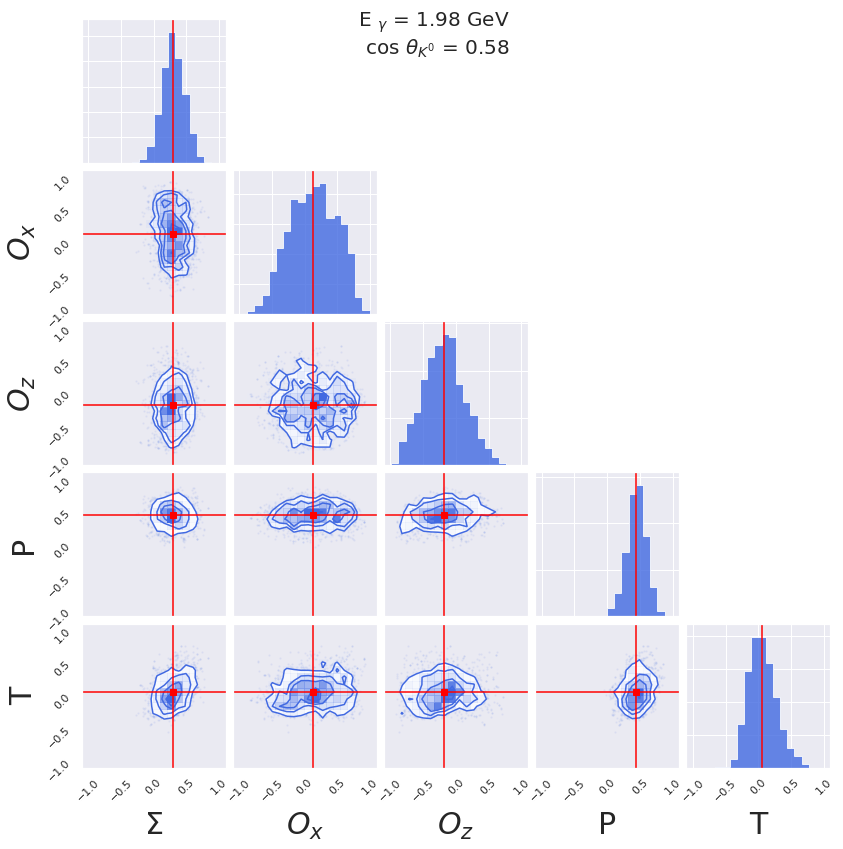

In [13]:
# corner plots for all bins

Eg_bins = [1.23,1.48,1.73,1.98]
costh_bins = [[-0.81,-0.51,-0.27,-0.05,0.18,0.65],
              [-0.73,-0.37,-0.21,-0.07,0.09,0.26,0.44,0.77],
              [-0.59,-0.07,0.17,0.40,0.75],
              [-0.42, 0.58]
             ]

for ebin_idx in range(len(Eg_bins)):
    for tbin_idx in range(len(costh_bins[ebin_idx])):
        # get the bin
        dfEg = csv_df[csv_df['Egamma']==Eg_bins[ebin_idx]]
        dfCosth = dfEg[dfEg['costh']==costh_bins[ebin_idx][tbin_idx]]

        # get df for each obs
        dfB = dfCosth[dfCosth['Obs']=='B']
        dfB = dfB.reset_index()
        dfOx = dfCosth[dfCosth['Obs']=='Ox']
        dfOx = dfOx.reset_index()
        dfOz = dfCosth[dfCosth['Obs']=='Oz']
        dfOz = dfOz.reset_index()
        dfR = dfCosth[dfCosth['Obs']=='R']
        dfR = dfR.reset_index()
        dfT = dfCosth[dfCosth['Obs']=='T']
        dfT = dfT.reset_index()

        # merge them
        dfObs = pd.concat([dfB['Val'], dfOx['Val'], dfOz['Val'], dfR['Val'], dfT['Val']], 
                  axis=1, keys=['B','Ox','Oz','R','T'])

        # corner plot for one bin
        import corner 

        fig = corner.corner(dfObs,
                            color='royalblue', 
                            range=[(-1.1,1.1),(-1.1,1.1),(-1.1,1.1),(-1.1,1.1),(-1.1,1.1)],
                            truths=dfObs.mean().values, truth_color='red',
                            label_kwargs={'fontsize':30, 'labelpad':20},
                            hist_kwargs = {'histtype':'stepfilled','alpha':0.8},
                            labels=['$\Sigma$','$O_x$','$O_z$','P','T'])
        fig.suptitle(r'E $_{\gamma}$ = ' + str(Eg_bins[ebin_idx]) + ' GeV\n '+
                      r'cos $\theta _{K^0}$ = ' + str(costh_bins[ebin_idx][tbin_idx]), fontsize=20)

        plt.show()

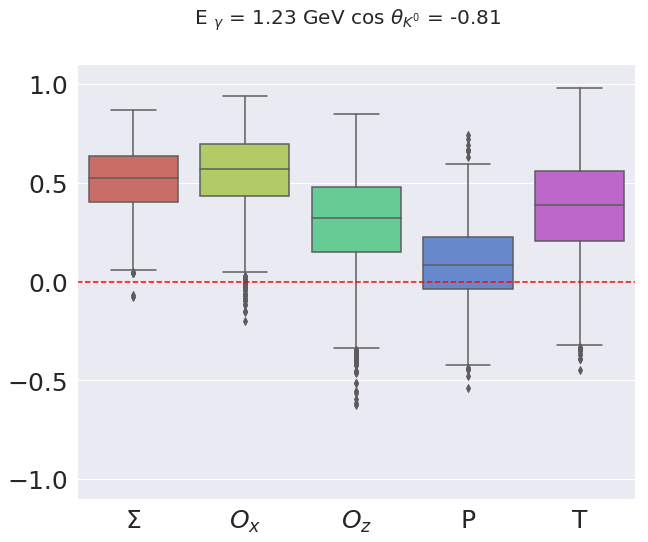

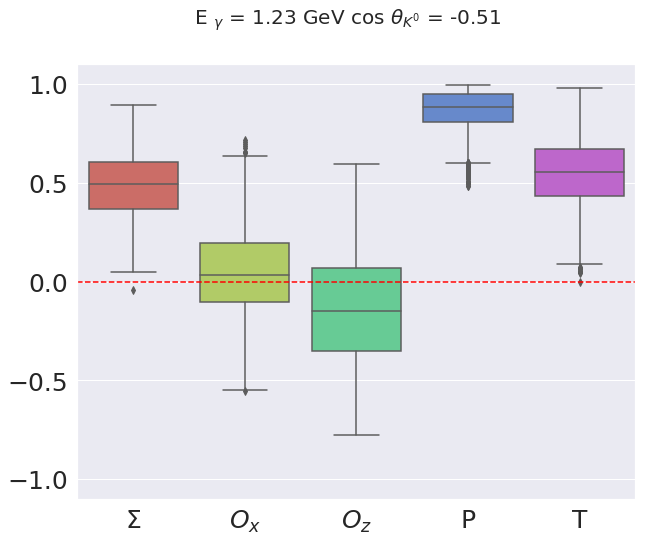

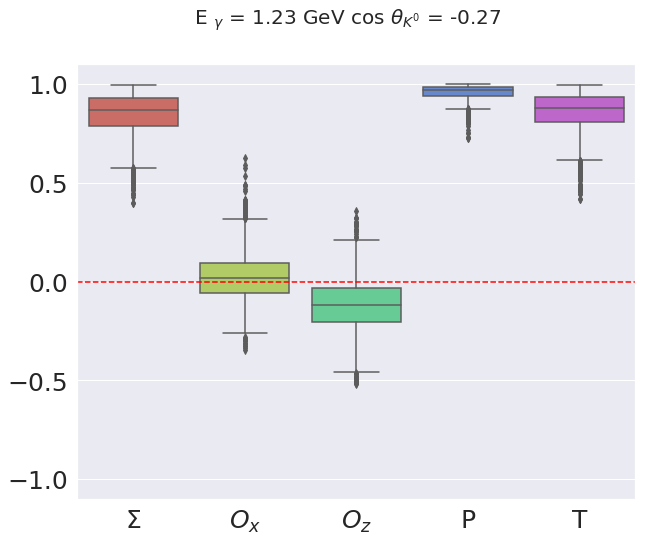

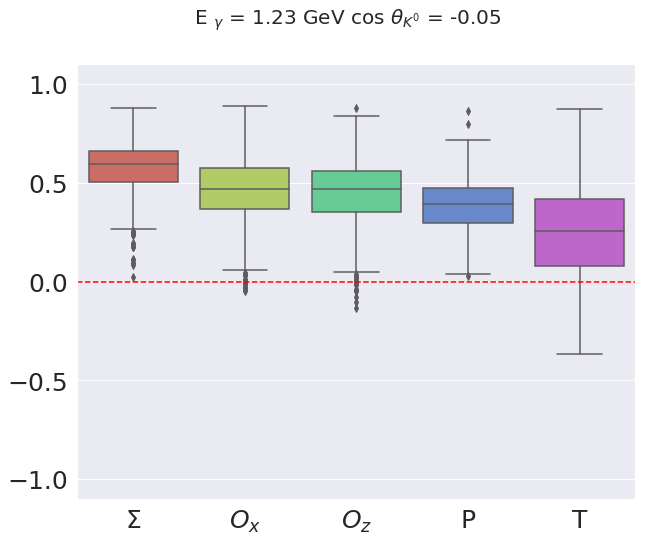

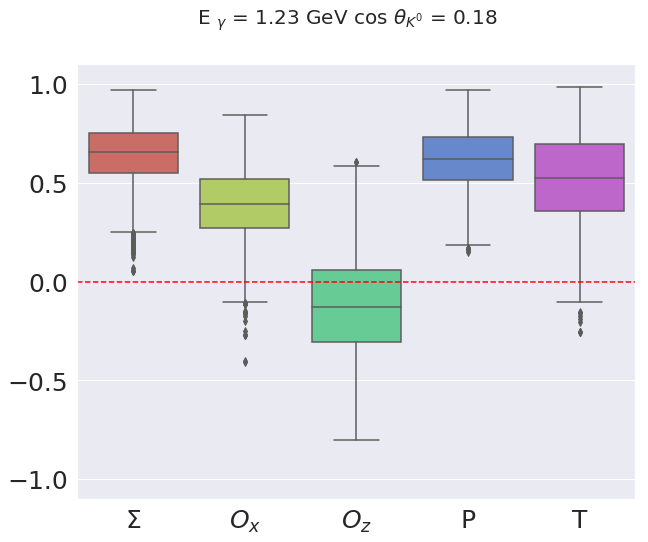

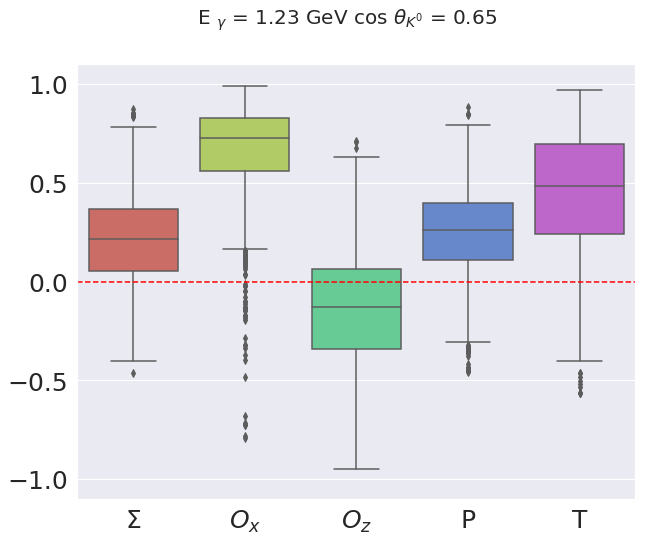

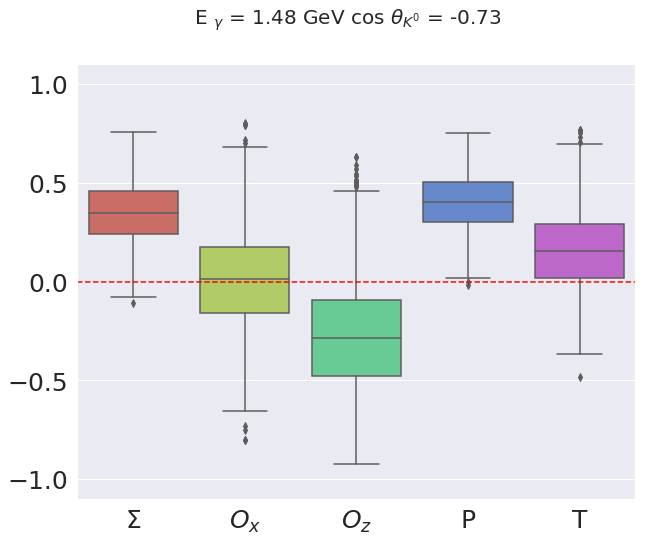

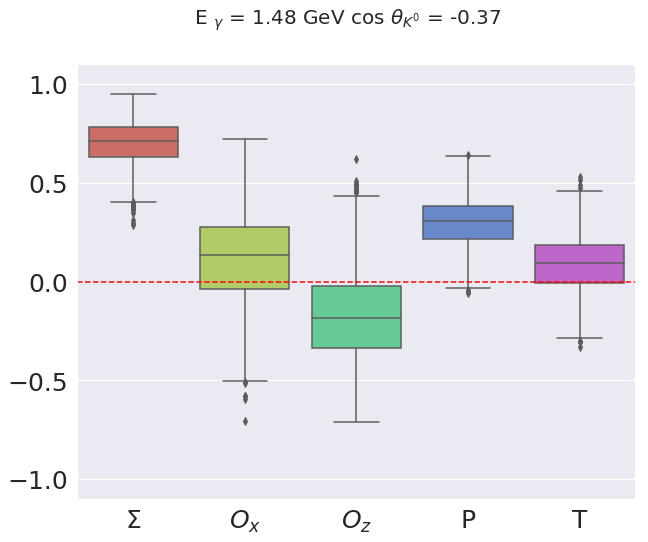

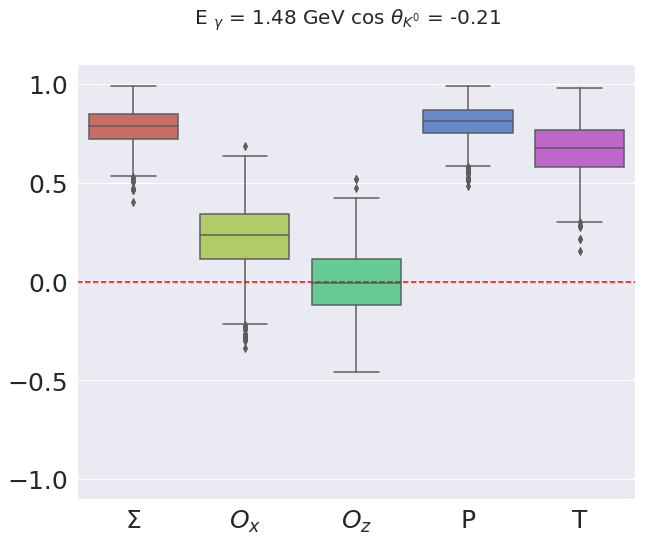

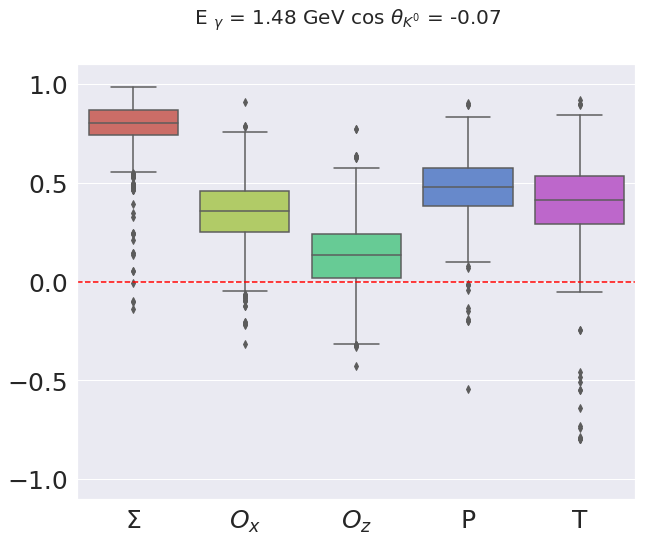

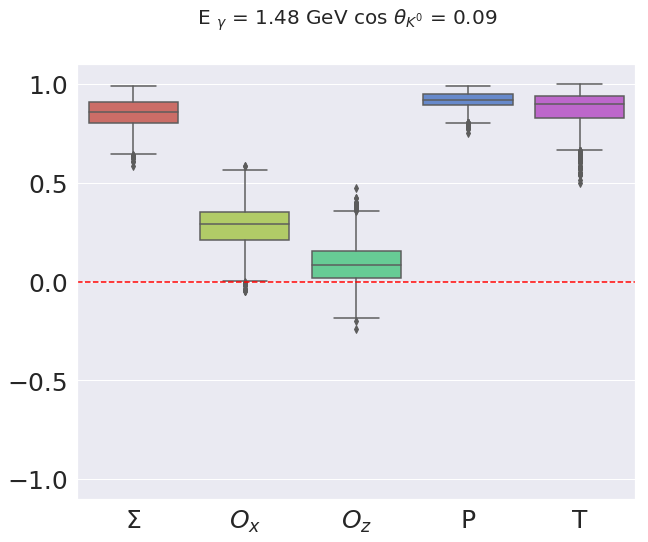

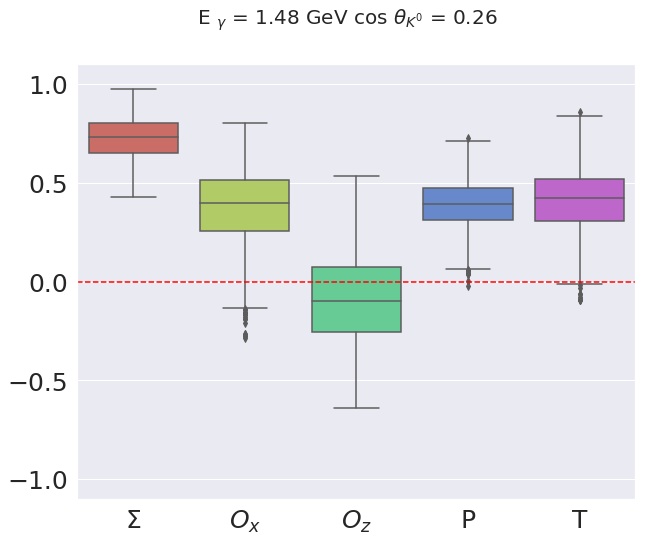

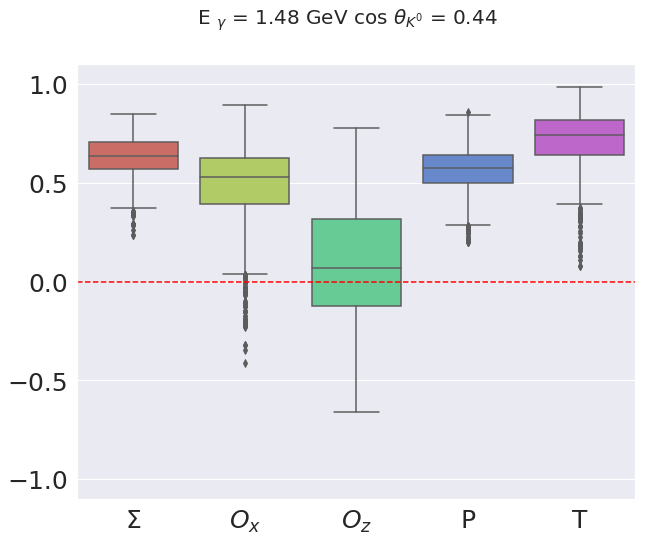

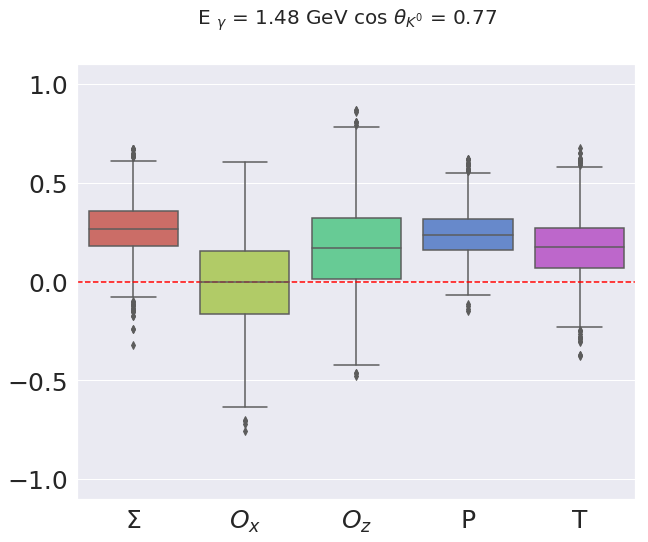

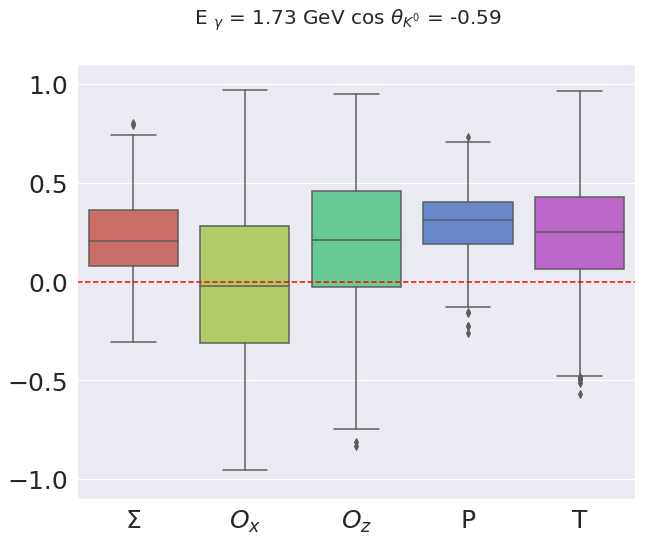

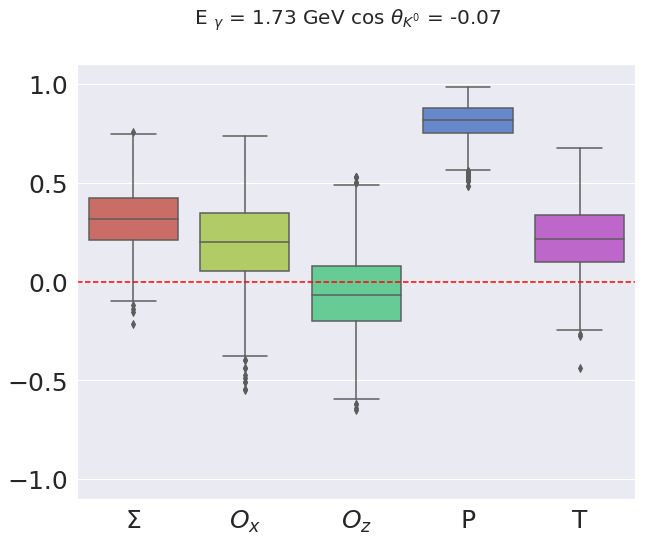

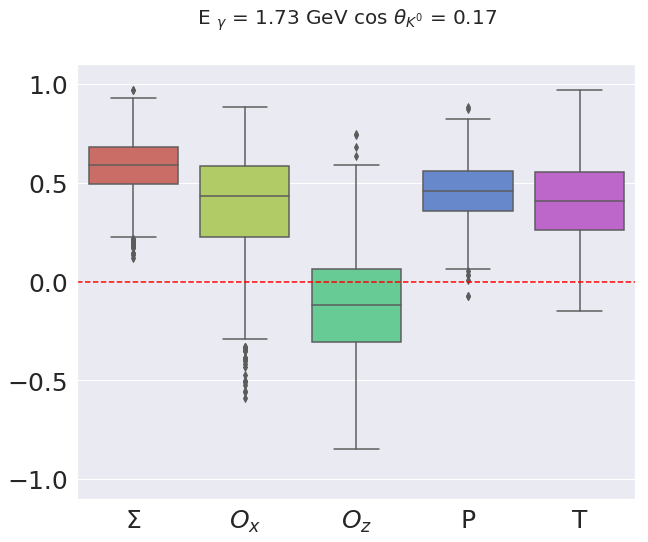

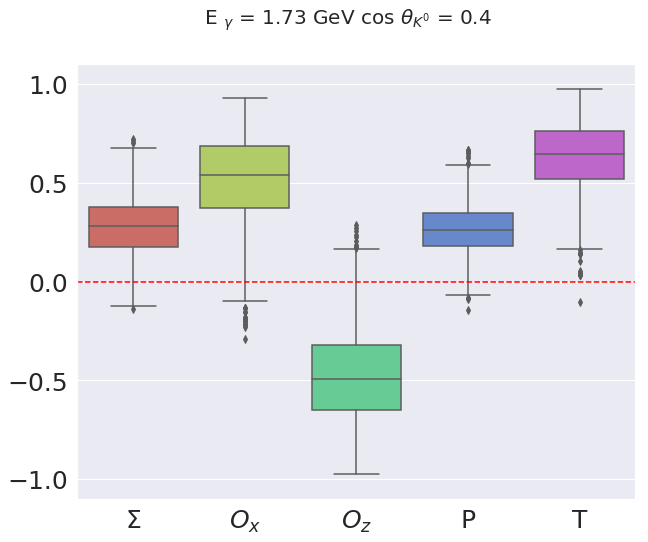

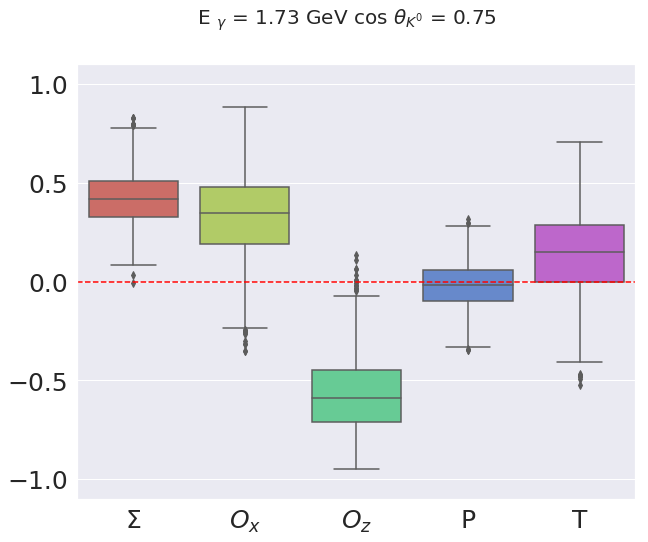

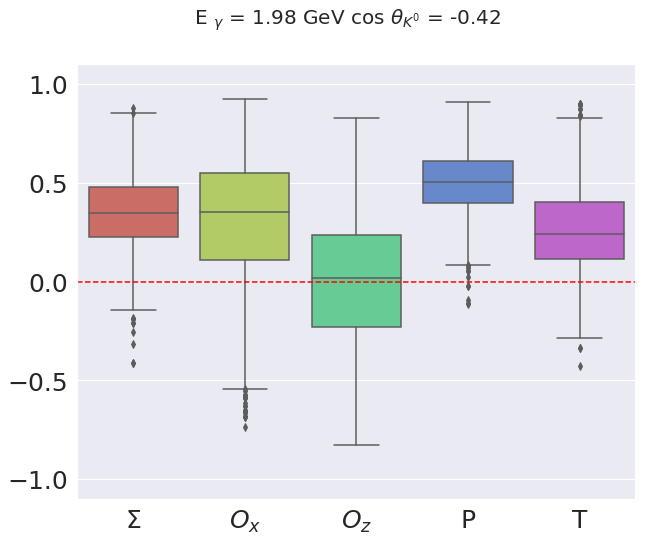

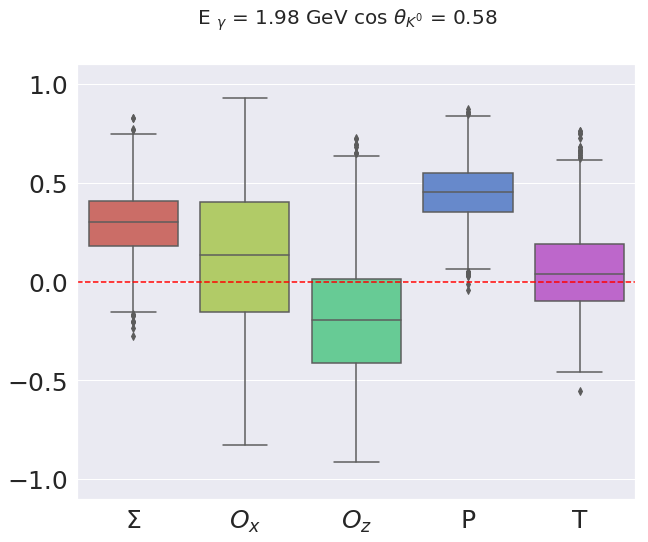

In [14]:
# observable box plots for all bins

Eg_bins = [1.23,1.48,1.73,1.98]
costh_bins = [[-0.81,-0.51,-0.27,-0.05,0.18,0.65],
              [-0.73,-0.37,-0.21,-0.07,0.09,0.26,0.44,0.77],
              [-0.59,-0.07,0.17,0.40,0.75],
              [-0.42, 0.58]
             ]

for ebin_idx in range(len(Eg_bins)):
    for tbin_idx in range(len(costh_bins[ebin_idx])):
        # get the bin
        dfEg = csv_df[csv_df['Egamma']==Eg_bins[ebin_idx]]
        dfCosth = dfEg[dfEg['costh']==costh_bins[ebin_idx][tbin_idx]]

        # get df for each obs
        dfB = dfCosth[dfCosth['Obs']=='B']
        dfB = dfB.reset_index()
        dfOx = dfCosth[dfCosth['Obs']=='Ox']
        dfOx = dfOx.reset_index()
        dfOz = dfCosth[dfCosth['Obs']=='Oz']
        dfOz = dfOz.reset_index()
        dfR = dfCosth[dfCosth['Obs']=='R']
        dfR = dfR.reset_index()
        dfT = dfCosth[dfCosth['Obs']=='T']
        dfT = dfT.reset_index()

        # merge them
        dfObs = pd.concat([dfB['Val'], dfOx['Val'], dfOz['Val'], dfR['Val'], dfT['Val']], 
                  axis=1, keys=['B','Ox','Oz','R','T'])

        # Use cubehelix to get a custom sequential palette
        pal = sns.color_palette("hls", n_obs)

        # Show each distribution with both violins and points
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
        bPlt = sns.boxplot(data=dfObs, palette=pal)

        ax.set_ylim(-1.1,1.1)
        ax.axhline(0.0,color='red',linestyle='--')
        ax.set_xticklabels(['$\Sigma$','$O_x$','$O_z$','P','T'])
        bPlt.tick_params(labelsize=25)
        
        fig.suptitle(r'E $_{\gamma}$ = ' + str(Eg_bins[ebin_idx]) + ' GeV '+
                      r'cos $\theta _{K^0}$ = ' + str(costh_bins[ebin_idx][tbin_idx]), fontsize=20)

        plt.show()